<a href="https://colab.research.google.com/github/denisshaf/DSPractice/blob/dev/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Practice DS 1.2] Exploratory data analysis

In [ ]:
import os
import itertools
import gc

import pandas as pd
import numpy as np
from scipy import stats, special
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import dask.dataframe as dd

from matplotlib import pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_pacf

import nltk
from nltk.tokenize import word_tokenize, MWETokenizer
nltk.download('punkt')
import string
import re

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


## MyDrive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ln -s '/content/drive/MyDrive' '/mydrive'

In [ ]:
data = {}
path = '/mydrive/DSPractice/data/after_dqc/'
for file in os.listdir(path):
  data[file.split('.')[0]] = pd.read_csv(f'{path}{file}')

In [ ]:
data.keys()

dict_keys(['result', 'items', 'item_categories', 'sample_submission', 'sales_train', 'shops', 'test'])

## Show data

In [ ]:
items = data['items'].merge(data['item_categories'], how='outer')
merged_data = items.merge(data['sales_train'], how='outer').merge(data['shops'])

In [ ]:
merged_data.sample(10)

item_name  item_id  \
1620192                              НАШИ МУЛЬТИКИ э. (BD)    15600   
1926096                NHL 12 [Xbox 360, русские субтитры]     5032   
2848378  Pokemon XY Стартовый набор Первобытная дуэль Я...     5840   
2630271               ENIGMA  The Platinum Collection  2CD     3120   
2891401                                        КАЗИНО (BD)    12337   
1556302                    Открытка Код 8 (в ассортименте)    16832   
30981                  УБОЙНОЕ РОЖДЕСТВО ГАРОЛЬДА И КУМАРА    20039   
2079951  Sims 3 (обновлённое издание) [PC, русская версия]     6466   
2551012          MODERN TALKING The Final Album DVD (Кир.)     4652   
1931038                       ХОББИТ: ПУСТОШЬ СМАУГА (2BD)    21383   

         item_category_id                      item_category_name        date  \
1620192                37                          Кино - Blu-Ray  16.11.2014   
1926096                23                         Игры - XBOX 360  10.02.2014   
2848378                65  Подарки - Настольные игры (компактные)  25.10.2015   
2630271                55     Музыка - CD локального производства  20.04.2013   
2891401                37                          Кино - Blu-Ray  27.12.2014   
1556302                66            Подарки - Открытки, наклейки  06.09.2013   
30981                  40                              Кино - DVD  31.03.2013   
2079951                30           Игры PC - Стандартные издания  29.01.2014   
2551012                59              Музыка - Музыкальное видео  12.04.2013   
1931038                37                          Кино - Blu-Ray  28.06.2014   

         date_block_num  shop_id  item_price  item_cnt_day  \
1620192            22.0      5.0       58.00           1.0   
1926096            13.0     35.0      306.79           1.0   
2848378            33.0     48.0      599.00           1.0   
2630271             3.0     57.0      399.00           1.0   
2891401            23.0     34.0      383.96           1.0   
1556302             8.0     21.0       45.00           2.0   
30981               2.0     54.0      399.00           1.0   
2079951            12.0     37.0      349.50           1.0   
2551012             3.0     28.0      349.00           1.0   
1931038            17.0     35.0      749.00           2.0   

                               shop_name  
1620192           Вологда ТРЦ "Мармелад"  
1926096      Н.Новгород ТРЦ "Фантастика"  
2848378     Томск ТРЦ "Изумрудный Город"  
2630271          Якутск Орджоникидзе, 56  
2891401             Н.Новгород ТРЦ "РИО"  
1556302           Москва МТРЦ "Афи Молл"  
30981                    Химки ТЦ "Мега"  
2079951            Новосибирск ТЦ "Мега"  
2551012  Москва ТЦ "МЕГА Теплый Стан" II  
1931038      Н.Новгород ТРЦ "Фантастика"

## Explore data

#### Text data

##### `shop_name`

We can see that the first word in `shop_name` is a city, then go either a shop type ('ТЦ', 'ТК', etc) and a shop name, or a shop address.

In [ ]:
data['shops']['shop_name']

0                       !Якутск Орджоникидзе, 56 фран
1                       !Якутск ТЦ "Центральный" фран
2                                    Адыгея ТЦ "Мега"
3                      Балашиха ТРК "Октябрь-Киномир"
4                            Волжский ТЦ "Волга Молл"
5                              Вологда ТРЦ "Мармелад"
6                          Воронеж (Плехановская, 13)
7                              Воронеж ТРЦ "Максимир"
8                        Воронеж ТРЦ Сити-Парк "Град"
9                                   Выездная Торговля
10                         Жуковский ул. Чкалова 39м?
11                         Жуковский ул. Чкалова 39м²
12                                Интернет-магазин ЧС
13                                Казань ТЦ "Бехетле"
14                            Казань ТЦ "ПаркХаус" II
15                               Калуга ТРЦ "XXI век"
16                                   Коломна ТЦ "Рио"
17                      Красноярск ТЦ "Взлетка Плаза"
18                          

In [ ]:
len(merged_data[merged_data['shop_name'] == 'Интернет-магазин ЧС'])

34685

In [ ]:
len(merged_data[merged_data['shop_name'] == 'Выездная Торговля'])

3751

In [ ]:
len(merged_data[merged_data['shop_name'] == 'Жуковский ул. Чкалова 39м?']), len(merged_data[merged_data['shop_name'] == 'Жуковский ул. Чкалова 39м²'])

(21397, 499)

In [ ]:
len(merged_data[merged_data['shop_name'] == 'Москва ТК "Буденовский" (пав.А2)']), len(merged_data[merged_data['shop_name'] == 'Москва ТК "Буденовский" (пав.К7)'])

(6963, 53032)

In [ ]:
exceptions = ['Выездная Торговля', 'Интернет-магазин ЧС', 'Цифровой склад 1С-Онлайн']
exceptions_ind = list(data['shops']['shop_name'][data['shops']['shop_name'].isin(exceptions)].index)
online_shops = ['Интернет-магазин ЧС', 'Цифровой склад 1С-Онлайн']
online_shops_ind = list(data['shops']['shop_name'][data['shops']['shop_name'].isin(online_shops)].index)

In [ ]:
data['shops'].loc[0, 'shop_name'] = 'Якутск Орджоникидзе,56'
data['shops'].loc[1, 'shop_name'] = 'Якутск ТЦ "Центральный"'
data['shops'].loc[6, 'shop_name'] = 'Воронеж Плехановская,13'
data['shops'].loc[8, 'shop_name'] = 'Воронеж ТРЦ "Град"'
data['shops'].loc[10, 'shop_name'] = 'Жуковский Чкалова,39'
data['shops'].loc[11, 'shop_name'] = 'Жуковский Чкалова,39'
data['shops'].loc[22, 'shop_name'] = 'Москва Магазин "С21"'
data['shops'].loc[46, 'shop_name'] = 'СергиевПосад ТЦ "7Я"'
data['shops'].loc[57, 'shop_name'] = 'Якутск Орджоникидзе,56'

In [ ]:
data['shops']['shop_name']

0                              Якутск Орджоникидзе,56
1                             Якутск ТЦ "Центральный"
2                                    Адыгея ТЦ "Мега"
3                      Балашиха ТРК "Октябрь-Киномир"
4                            Волжский ТЦ "Волга Молл"
5                              Вологда ТРЦ "Мармелад"
6                             Воронеж Плехановская,13
7                              Воронеж ТРЦ "Максимир"
8                                  Воронеж ТРЦ "Град"
9                                   Выездная Торговля
10                               Жуковский Чкалова,39
11                               Жуковский Чкалова,39
12                                Интернет-магазин ЧС
13                                Казань ТЦ "Бехетле"
14                            Казань ТЦ "ПаркХаус" II
15                               Калуга ТРЦ "XXI век"
16                                   Коломна ТЦ "Рио"
17                      Красноярск ТЦ "Взлетка Плаза"
18                          

In [ ]:
regexpr = re.compile(r'[^"\W][\w-]+|".+?"')
regexpr.findall('Н.Новгород ТРЦ "Фантастика"')

['Новгород', 'ТРЦ', '"Фантастика"']

In [ ]:
tokens = [regexpr.findall(sent) for sent in data['shops']['shop_name']]
tokens

[['Якутск', 'Орджоникидзе', '56'],
 ['Якутск', 'ТЦ', '"Центральный"'],
 ['Адыгея', 'ТЦ', '"Мега"'],
 ['Балашиха', 'ТРК', '"Октябрь-Киномир"'],
 ['Волжский', 'ТЦ', '"Волга Молл"'],
 ['Вологда', 'ТРЦ', '"Мармелад"'],
 ['Воронеж', 'Плехановская', '13'],
 ['Воронеж', 'ТРЦ', '"Максимир"'],
 ['Воронеж', 'ТРЦ', '"Град"'],
 ['Выездная', 'Торговля'],
 ['Жуковский', 'Чкалова', '39'],
 ['Жуковский', 'Чкалова', '39'],
 ['Интернет-магазин', 'ЧС'],
 ['Казань', 'ТЦ', '"Бехетле"'],
 ['Казань', 'ТЦ', '"ПаркХаус"', 'II'],
 ['Калуга', 'ТРЦ', '"XXI век"'],
 ['Коломна', 'ТЦ', '"Рио"'],
 ['Красноярск', 'ТЦ', '"Взлетка Плаза"'],
 ['Красноярск', 'ТЦ', '"Июнь"'],
 ['Курск', 'ТЦ', '"Пушкинский"'],
 ['Москва', '"Распродажа"'],
 ['Москва', 'МТРЦ', '"Афи Молл"'],
 ['Москва', 'Магазин', '"С21"'],
 ['Москва', 'ТК', '"Буденовский"', 'пав', 'А2'],
 ['Москва', 'ТК', '"Буденовский"', 'пав', 'К7'],
 ['Москва', 'ТРК', '"Атриум"'],
 ['Москва', 'ТЦ', '"Ареал"', 'Беляево'],
 ['Москва', 'ТЦ', '"МЕГА Белая Дача II"'],
 ['Москв

In [ ]:
list(filter(lambda s: len(s) <= 2, tokens))

[['Выездная', 'Торговля'],
 ['Интернет-магазин', 'ЧС'],
 ['Москва', '"Распродажа"']]

In [ ]:
[tokens[i] for i in exceptions_ind]

[['Выездная', 'Торговля'],
 ['Интернет-магазин', 'ЧС'],
 ['Цифровой', 'склад', '1С-Онлайн']]

In [ ]:
shop_types = ['ТЦ', 'ТРК', 'ТРЦ', 'МТРЦ', 'Магазин', 'ТК']

def parse_shops(sentences):
  shops = {'city': [None] * len(sentences), 'type': [None] * len(sentences),
           'name': [None] * len(sentences), 'street': [None] * len(sentences),
           'bulding': [None] * len(sentences), 'online': [None] * len(sentences)}

  for i, tokens in enumerate(sentences):
    if i not in exceptions_ind:
      shops['city'][i] = tokens[0]

      if tokens[1] in shop_types:
        shops['type'][i] = tokens[1]
      elif tokens[1].startswith('"'):
        shops['name'][i] = tokens[1]
      else:
        shops['street'][i] = tokens[1]

      if len(tokens) > 2:
        if tokens[2].startswith('"'):
          shops['name'][i] = tokens[2].strip('"')
        else:
          shops['bulding'][i] = tokens[2]

      if len(tokens) > 3:
        shops['street'][i] = tokens[3]
      if len(tokens) > 4:
        shops['bulding'][i] = tokens[4]

      if i in online_shops_ind:
        shops['online'] = True
      else:
        shops['online'] = False

  return shops

In [ ]:
address = pd.DataFrame.from_dict(parse_shops(tokens))
address

city     type                 name        street bulding  online
0         Якутск     None                 None  Орджоникидзе      56   False
1         Якутск       ТЦ          Центральный          None    None   False
2         Адыгея       ТЦ                 Мега          None    None   False
3       Балашиха      ТРК      Октябрь-Киномир          None    None   False
4       Волжский       ТЦ           Волга Молл          None    None   False
5        Вологда      ТРЦ             Мармелад          None    None   False
6        Воронеж     None                 None  Плехановская      13   False
7        Воронеж      ТРЦ             Максимир          None    None   False
8        Воронеж      ТРЦ                 Град          None    None   False
9           None     None                 None          None    None   False
10     Жуковский     None                 None       Чкалова      39   False
11     Жуковский     None                 None       Чкалова      39   False
12          None     None                 None          None    None   False
13        Казань       ТЦ              Бехетле          None    None   False
14        Казань       ТЦ             ПаркХаус            II    None   False
15        Калуга      ТРЦ              XXI век          None    None   False
16       Коломна       ТЦ                  Рио          None    None   False
17    Красноярск       ТЦ        Взлетка Плаза          None    None   False
18    Красноярск       ТЦ                 Июнь          None    None   False
19         Курск       ТЦ           Пушкинский          None    None   False
20        Москва     None         "Распродажа"          None    None   False
21        Москва     МТРЦ             Афи Молл          None    None   False
22        Москва  Магазин                  С21          None    None   False
23        Москва       ТК          Буденовский           пав      А2   False
24        Москва       ТК          Буденовский           пав      К7   False
25        Москва      ТРК               Атриум          None    None   False
26        Москва       ТЦ                Ареал       Беляево    None   False
27        Москва       ТЦ   МЕГА Белая Дача II          None    None   False
28        Москва       ТЦ     МЕГА Теплый Стан            II    None   False
29        Москва       ТЦ            Новый век    Новокосино    None   False
30        Москва       ТЦ           Перловский          None    None   False
31        Москва       ТЦ          Семеновский          None    None   False
32        Москва       ТЦ       Серебряный Дом          None    None   False
33        Мытищи      ТРК                 XL-3          None    None   False
34      Новгород      ТРЦ                  РИО          None    None   False
35      Новгород      ТРЦ           Фантастика          None    None   False
36   Новосибирск      ТРЦ  Галерея Новосибирск          None    None   False
37   Новосибирск       ТЦ                 Мега          None    None   False
38          Омск       ТЦ                 Мега          None    None   False
39  РостовНаДону      ТРК   Мегацентр Горизонт          None    None   False
40  РостовНаДону      ТРК   Мегацентр Горизонт     Островной    None   False
41  РостовНаДону       ТЦ                 Мега          None    None   False
42           СПб       ТК        Невский Центр          None    None   False
43           СПб       ТК               Сенная          None    None   False
44        Самара       ТЦ              Мелодия          None    None   False
45        Самара       ТЦ             ПаркХаус          None    None   False
46  СергиевПосад       ТЦ                   7Я          None    None   False
47        Сургут      ТРЦ            Сити Молл          None    None   False
48         Томск      ТРЦ     Изумрудный Город          None    None   False
49        Тюмень      ТРЦ             Кристалл          None    None   False
50        Тюмень       ТЦ               Гудвин          None    None   False
51      

As we can see, columns `street` and `bulding` are very sparse, so it would be better to drop them. Also the column `name` seems to be not really informative, and also it's values are really different, so it will take much place, so it also should by dropped.

In [ ]:
address.drop(columns=['name', 'street', 'bulding'], inplace=True)
address

city     type  online
0         Якутск     None   False
1         Якутск       ТЦ   False
2         Адыгея       ТЦ   False
3       Балашиха      ТРК   False
4       Волжский       ТЦ   False
5        Вологда      ТРЦ   False
6        Воронеж     None   False
7        Воронеж      ТРЦ   False
8        Воронеж      ТРЦ   False
9           None     None   False
10     Жуковский     None   False
11     Жуковский     None   False
12          None     None   False
13        Казань       ТЦ   False
14        Казань       ТЦ   False
15        Калуга      ТРЦ   False
16       Коломна       ТЦ   False
17    Красноярск       ТЦ   False
18    Красноярск       ТЦ   False
19         Курск       ТЦ   False
20        Москва     None   False
21        Москва     МТРЦ   False
22        Москва  Магазин   False
23        Москва       ТК   False
24        Москва       ТК   False
25        Москва      ТРК   False
26        Москва       ТЦ   False
27        Москва       ТЦ   False
28        Москва       ТЦ   False
29        Москва       ТЦ   False
30        Москва       ТЦ   False
31        Москва       ТЦ   False
32        Москва       ТЦ   False
33        Мытищи      ТРК   False
34      Новгород      ТРЦ   False
35      Новгород      ТРЦ   False
36   Новосибирск      ТРЦ   False
37   Новосибирск       ТЦ   False
38          Омск       ТЦ   False
39  РостовНаДону      ТРК   False
40  РостовНаДону      ТРК   False
41  РостовНаДону       ТЦ   False
42           СПб       ТК   False
43           СПб       ТК   False
44        Самара       ТЦ   False
45        Самара       ТЦ   False
46  СергиевПосад       ТЦ   False
47        Сургут      ТРЦ   False
48         Томск      ТРЦ   False
49        Тюмень      ТРЦ   False
50        Тюмень       ТЦ   False
51        Тюмень       ТЦ   False
52           Уфа       ТК   False
53           Уфа       ТЦ   False
54         Химки       ТЦ   False
55          None     None   False
56         Чехов      ТРЦ   False
57        Якутск     None   False
58        Якутск       ТЦ   False
59     Ярославль       ТЦ   False

In [ ]:
address.fillna({'type': 'Магазин'}, inplace=True)

As the values in the column `online` are very imballanced, this feature doesn't contains much information. So it would be better to move information about online status to column `city` that is just equal to Null in those places.

In [ ]:
address.loc[online_shops_ind, 'city'] = 'Интернет'
address.loc[online_shops_ind, 'type'] = 'Интернет-магазин'
address.fillna({'city': ''}, inplace=True)

In [ ]:
address.drop(columns=['online'], inplace=True)

In [ ]:
merged_data_addr = merged_data.merge(address, how='outer', left_on='shop_id', right_index=True)

There are shops with different names but they are actually the same.

In [ ]:
replace_shops_id = {57: 0, 58: 1, 11: 10}

##### `city`

In [ ]:
summed_data = merged_data_addr[['item_name', 'shop_name', 'date_block_num', 'item_cnt_day', 'city']].groupby(
    by=['item_name', 'shop_name', 'date_block_num', 'city'], as_index=False).agg(
        item_cnt_month=('item_cnt_day', 'sum'))

In [ ]:
summed_data

item_name  \
0                ! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.)         D   
1        !ABBYY FineReader 12 Professional Edition Full...   
2        !ABBYY FineReader 12 Professional Edition Full...   
3        !ABBYY FineReader 12 Professional Edition Full...   
4        !ABBYY FineReader 12 Professional Edition Full...   
...                                                    ...   
1609107                                Яйцо для Little Inu   
1609108                                Яйцо для Little Inu   
1609109                                Яйцо для Little Inu   
1609110                                Яйцо для Little Inu   
1609111                      Яйцо дракона (Игра престолов)   

                        shop_name  date_block_num      city  item_cnt_month  
0                 Химки ТЦ "Мега"            20.0     Химки             1.0  
1        Цифровой склад 1С-Онлайн            15.0  Интернет             2.0  
2        Цифровой склад 1С-Онлайн            18.0  Интернет             1.0  
3        Цифровой склад 1С-Онлайн            19.0  Интернет             1.0  
4        Цифровой склад 1С-Онлайн            20.0  Интернет             1.0  
...                           ...             ...       ...             ...  
1609107       Интернет-магазин ЧС             8.0  Интернет             1.0  
1609108          Коломна ТЦ "Рио"             1.0   Коломна             1.0  
1609109    СПб ТК "Невский Центр"             1.0       СПб             1.0  
1609110           СПб ТК "Сенная"             2.0       СПб             1.0  
1609111       Москва ТРК "Атриум"            14.0    Москва             1.0  

[1609112 rows x 5 columns]

In [ ]:
summed_data.describe()

date_block_num  item_cnt_month
count    1.609112e+06    1.609112e+06
mean     1.466471e+01    2.265234e+00
std      9.542283e+00    8.429607e+00
min      0.000000e+00   -2.200000e+01
25%      6.000000e+00    1.000000e+00
50%      1.400000e+01    1.000000e+00
75%      2.300000e+01    2.000000e+00
max      3.300000e+01    1.644000e+03

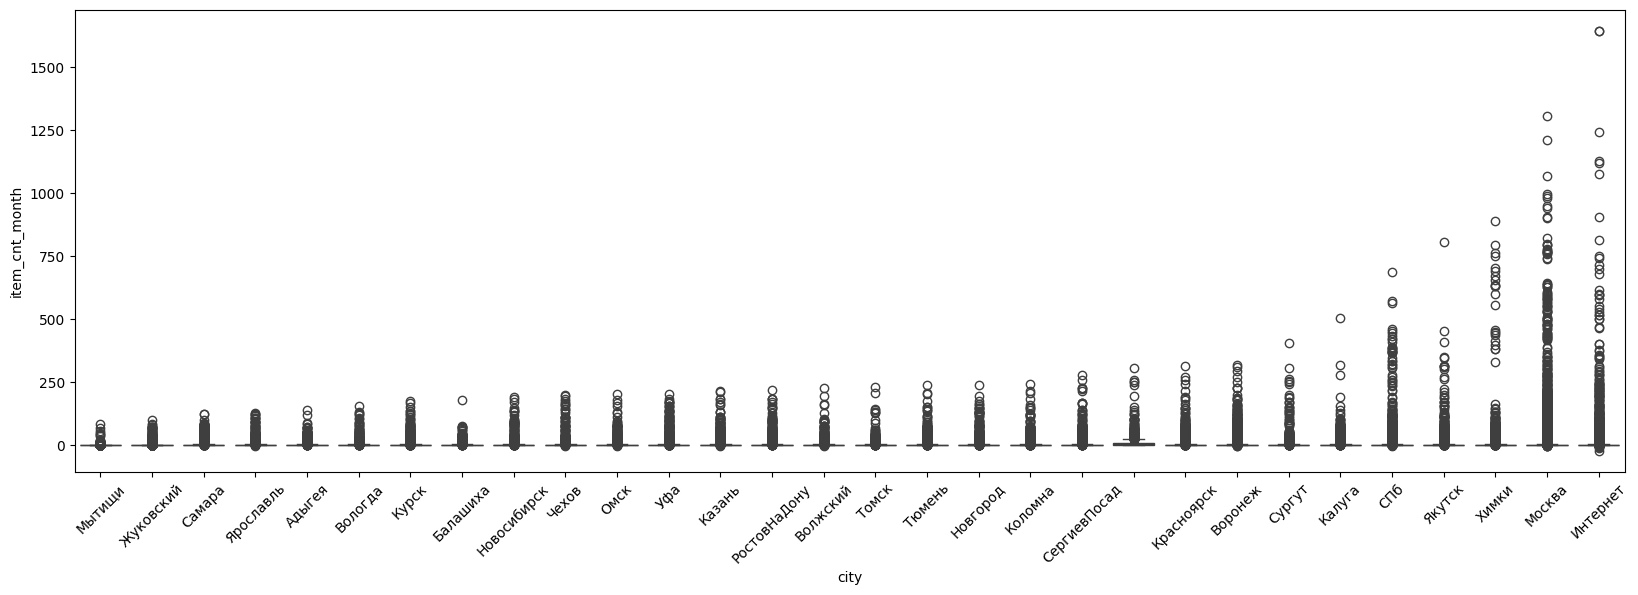

In [ ]:
plt_data = pd.concat([summed_data['city'], summed_data['item_cnt_month']], axis=1)
max_ind = plt_data.groupby(by=['city']).agg(max_month_count=('item_cnt_month', 'max')).sort_values(by=['max_month_count']).index

fig, axes = plt.subplots(figsize=(20, 6))
fig = sns.boxplot(x='city', y="item_cnt_month", data=plt_data, order=max_ind)
# fig.axis(ymin=0, ymax=10)
plt.xticks(rotation=45)
pass

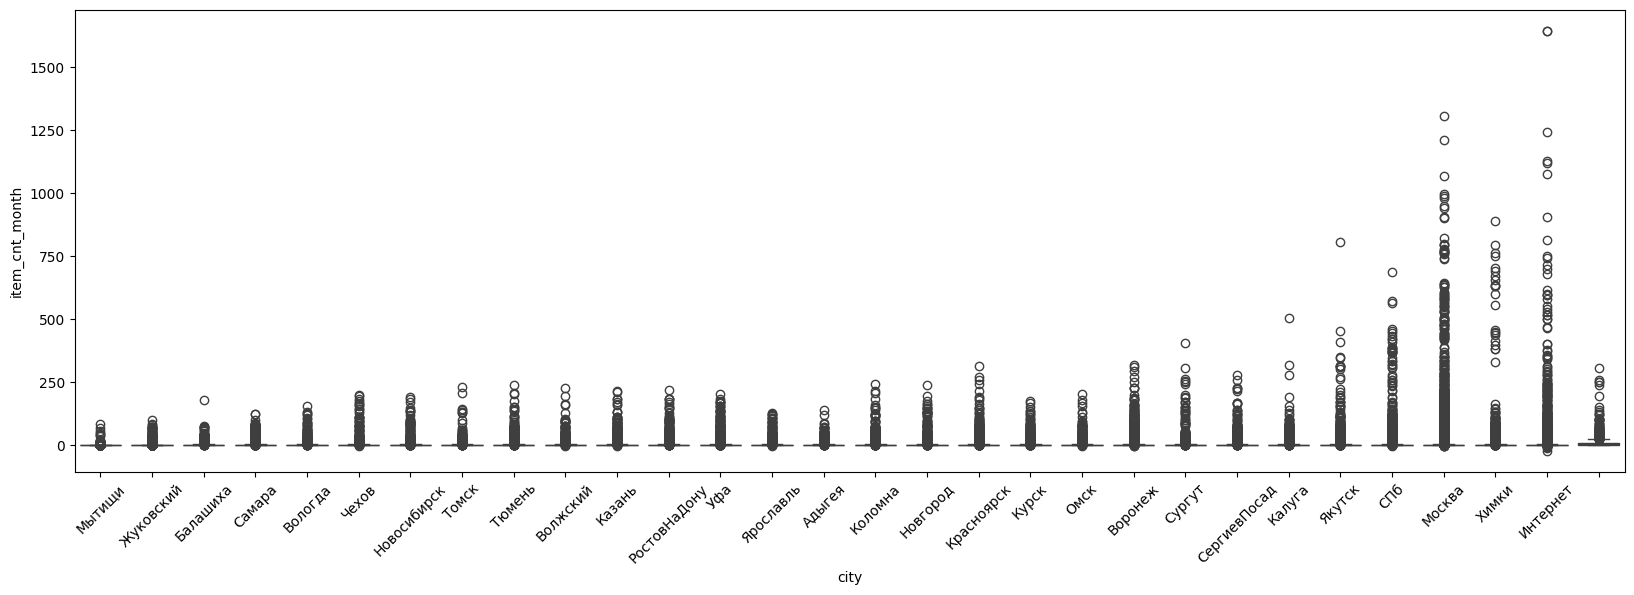

In [ ]:
mean_ind = plt_data.groupby(by=['city']).agg(mean_month_count=('item_cnt_month', 'mean')).sort_values(by=['mean_month_count']).index

fig, axes = plt.subplots(figsize=(20, 6))
fig = sns.boxplot(x='city', y="item_cnt_month", data=plt_data, order=mean_ind)
# fig.axis(ymin=0, ymax=10)
plt.xticks(rotation=45)
pass

##### `type`

In [ ]:
address['type'].value_counts()

type
ТЦ                  28
ТРЦ                 11
Магазин              8
ТРК                  5
ТК                   5
Интернет-магазин     2
МТРЦ                 1
Name: count, dtype: int64

In [ ]:
address.replace('МТРЦ', 'ТРЦ', inplace=True)

In [ ]:
summed_data = merged_data_addr[['item_name', 'shop_name', 'date_block_num', 'item_cnt_day', 'type']].groupby(
    by=['item_name', 'shop_name', 'date_block_num', 'type'], as_index=False).agg(
        item_cnt_month=('item_cnt_day', 'sum'))

In [ ]:
summed_data

item_name  \
0                ! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.)         D   
1        !ABBYY FineReader 12 Professional Edition Full...   
2        !ABBYY FineReader 12 Professional Edition Full...   
3        !ABBYY FineReader 12 Professional Edition Full...   
4        !ABBYY FineReader 12 Professional Edition Full...   
...                                                    ...   
1609107                                Яйцо для Little Inu   
1609108                                Яйцо для Little Inu   
1609109                                Яйцо для Little Inu   
1609110                                Яйцо для Little Inu   
1609111                      Яйцо дракона (Игра престолов)   

                        shop_name  date_block_num              type  \
0                 Химки ТЦ "Мега"            20.0                ТЦ   
1        Цифровой склад 1С-Онлайн            15.0  Интернет-магазин   
2        Цифровой склад 1С-Онлайн            18.0  Интернет-магазин   
3        Цифровой склад 1С-Онлайн            19.0  Интернет-магазин   
4        Цифровой склад 1С-Онлайн            20.0  Интернет-магазин   
...                           ...             ...               ...   
1609107       Интернет-магазин ЧС             8.0  Интернет-магазин   
1609108          Коломна ТЦ "Рио"             1.0                ТЦ   
1609109    СПб ТК "Невский Центр"             1.0                ТК   
1609110           СПб ТК "Сенная"             2.0                ТК   
1609111       Москва ТРК "Атриум"            14.0               ТРК   

         item_cnt_month  
0                   1.0  
1                   2.0  
2                   1.0  
3                   1.0  
4                   1.0  
...                 ...  
1609107             1.0  
1609108             1.0  
1609109             1.0  
1609110             1.0  
1609111             1.0  

[1609112 rows x 5 columns]

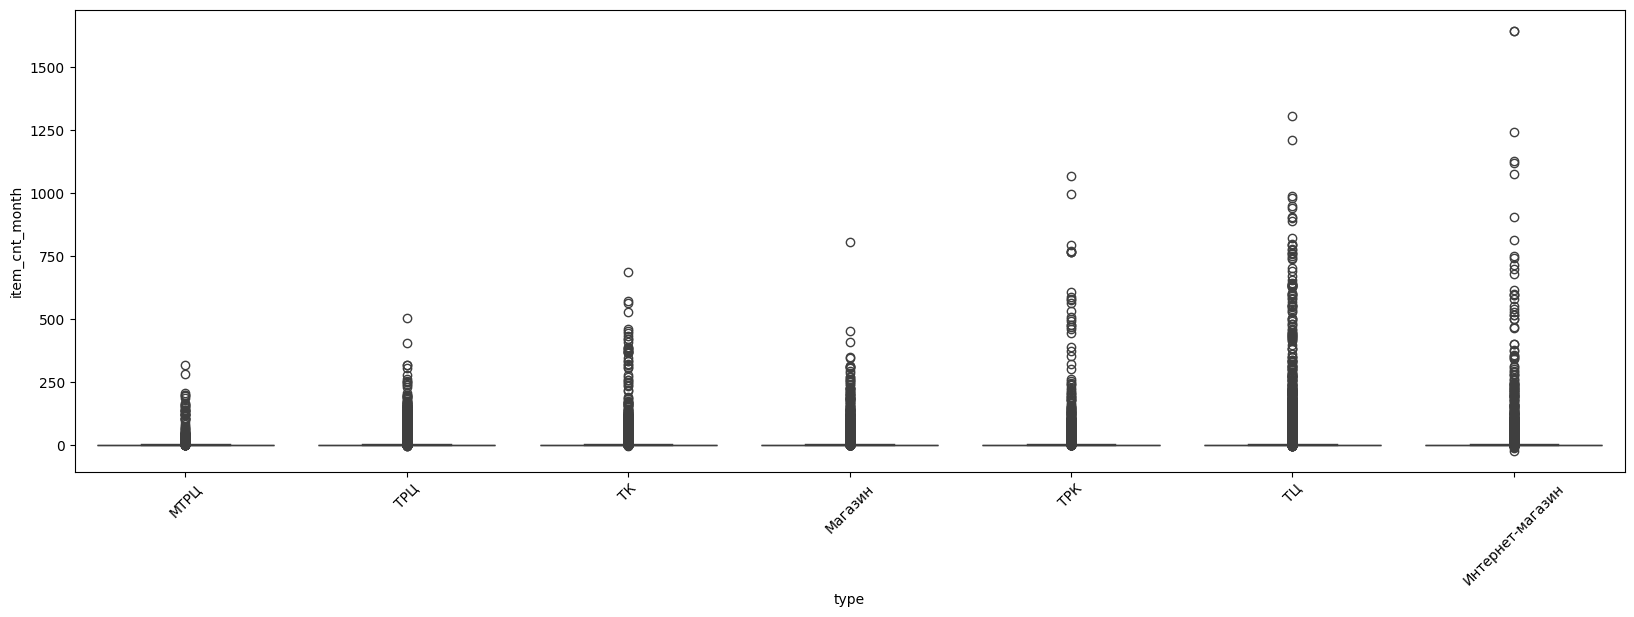

In [ ]:
plt_data = pd.concat([summed_data['type'], summed_data['item_cnt_month']], axis=1)
max_ind = plt_data.groupby(by=['type']).agg(max_month_count=('item_cnt_month', 'max')).sort_values(by=['max_month_count']).index

fig, axes = plt.subplots(figsize=(20, 6))
fig = sns.boxplot(x='type', y="item_cnt_month", data=plt_data, order=max_ind)
# fig.axis(ymin=0, ymax=10)
plt.xticks(rotation=45)
pass

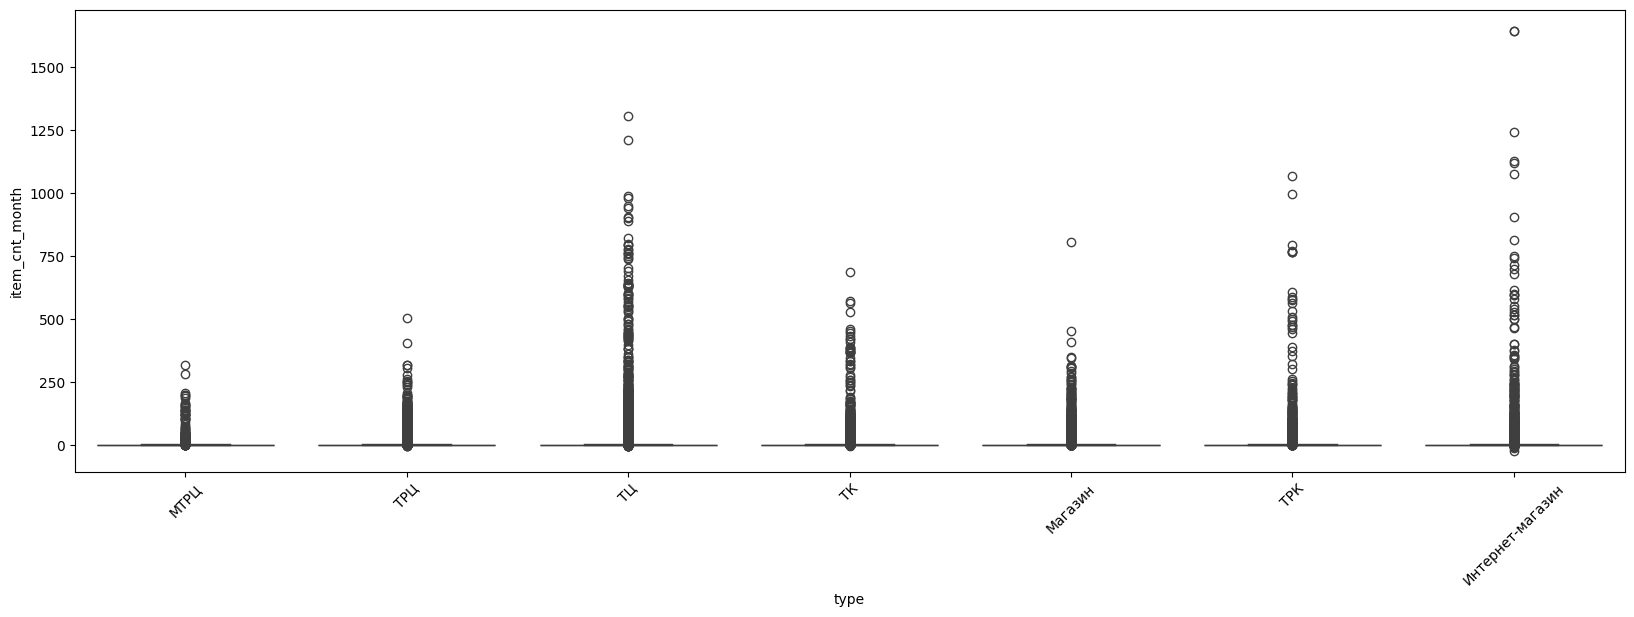

In [ ]:
mean_ind = plt_data.groupby(by=['type']).agg(mean_month_count=('item_cnt_month', 'mean')).sort_values(by=['mean_month_count']).index

fig, axes = plt.subplots(figsize=(20, 6))
fig = sns.boxplot(x='type', y="item_cnt_month", data=plt_data, order=mean_ind)
# fig.axis(ymin=0, ymax=10)
plt.xticks(rotation=45)
pass

We can see the outliers in `item_cnt_month`, although we've deleted the outliers from `item_cnt_day`, but new big values emerged after the sum. So we need to decide if we delete them or not.

##### `item_category_name`



In [ ]:
merged_data['item_category_name'].unique()

array(['Кино - DVD', 'Музыка - CD локального производства', 'Игры - PS3',
       'Игры PC - Стандартные издания', 'Игры - XBOX 360',
       'Кино - Blu-Ray', 'Кино - Коллекционное', 'Музыка - MP3',
       'Книги - Аудиокниги', 'Книги - Методические материалы 1С',
       'Книги - Аудиокниги 1С', 'Программы - Обучающие',
       'Программы - 1С:Предприятие 8', 'Программы - Для дома и офиса',
       'Музыка - Винил', 'Музыка - CD фирменного производства',
       'Кино - Blu-Ray 3D', 'Подарки - Развитие',
       'Музыка - Музыкальное видео', 'Музыка - Подарочные издания',
       'Игры - PSP', 'Игры PC - Дополнительные издания', 'Игры - PS4',
       'Игры - XBOX ONE', 'Игры PC - Коллекционные издания',
       'Подарки - Сувениры (в навеску)', 'Игры - PSVita',
       'Карты оплаты (Кино, Музыка, Игры)',
       'Подарки - Гаджеты, роботы, спорт', 'Игры - Аксессуары для игр',
       'Подарки - Фигурки', 'Аксессуары - PSP',
       'Подарки - Мягкие игрушки', 'Подарки - Настольные игры',
       '

In [ ]:
summed_data = merged_data_addr[['item_name', 'shop_name', 'date_block_num', 'item_cnt_day', 'item_category_name']].groupby(
    by=['item_name', 'shop_name', 'date_block_num', 'item_category_name'], as_index=False).agg(
        item_cnt_month=('item_cnt_day', 'sum'))

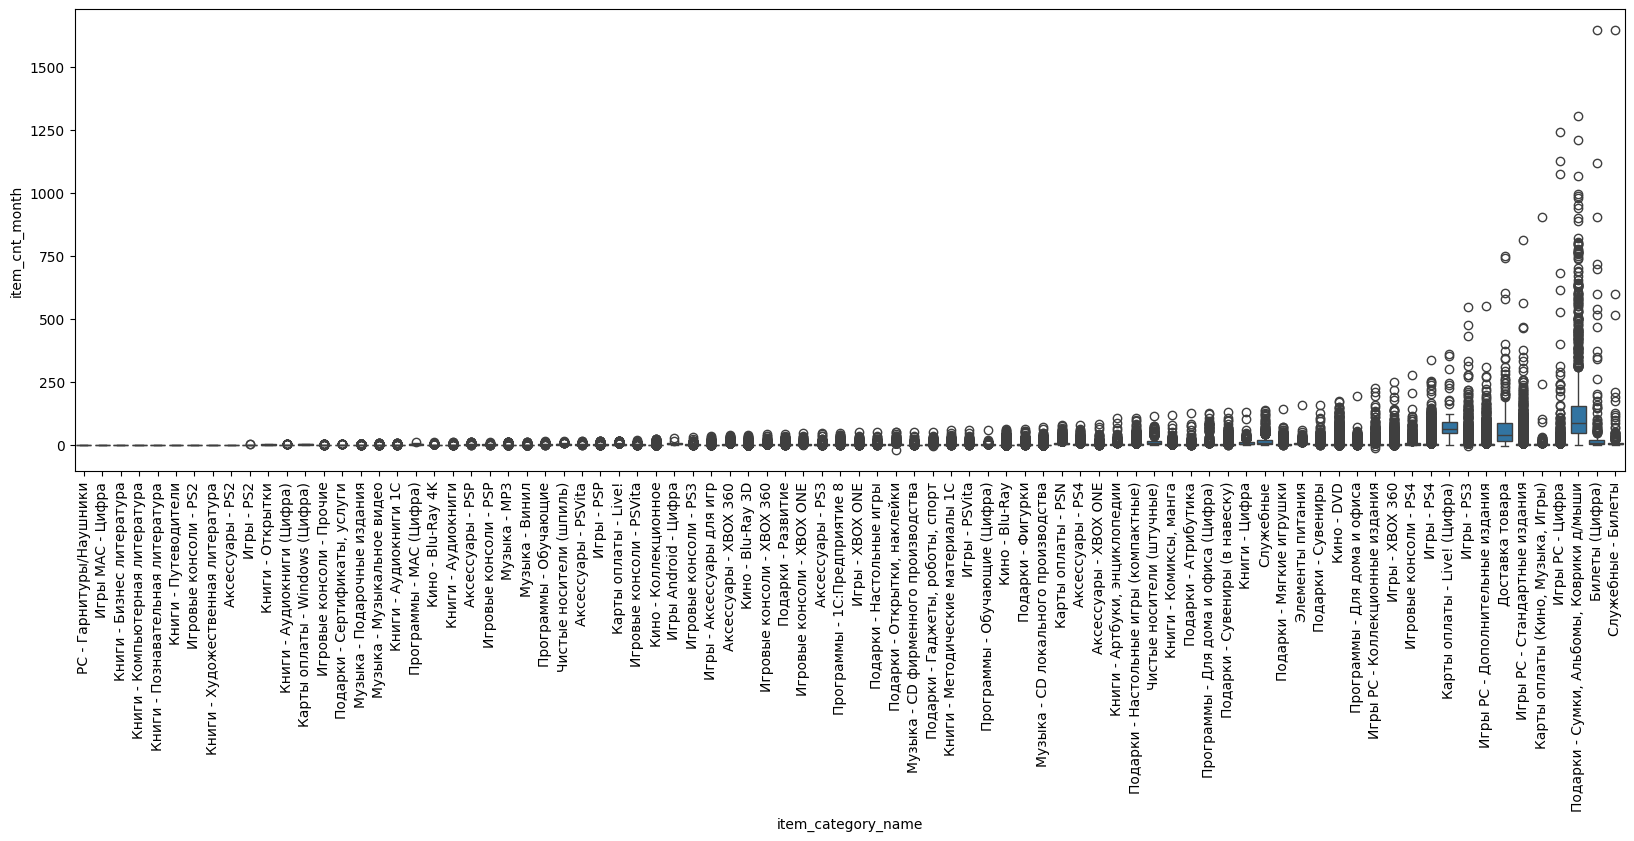

In [ ]:
plt_data = pd.concat([summed_data['item_category_name'], summed_data['item_cnt_month']], axis=1)
max_ind = plt_data.groupby(by=['item_category_name']).agg(max_month_count=('item_cnt_month', 'max')).sort_values(by=['max_month_count']).index

fig, axes = plt.subplots(figsize=(20, 6))
fig = sns.boxplot(x='item_category_name', y="item_cnt_month", data=plt_data, order=max_ind)
# fig.axis(ymin=0, ymax=10)
plt.xticks(rotation=90)
pass

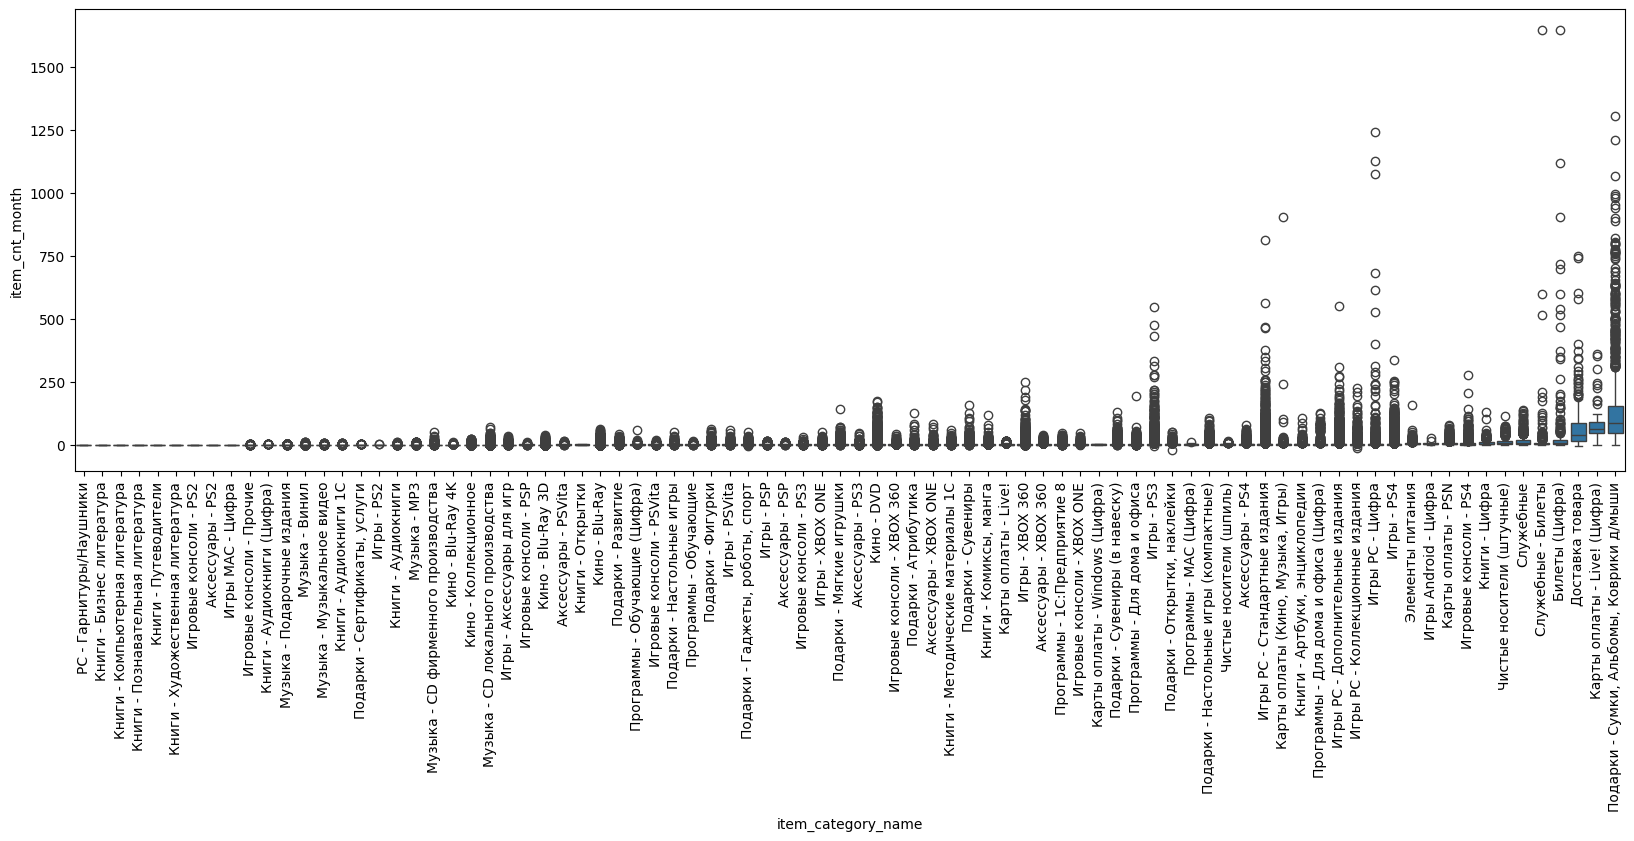

In [ ]:
plt_data = pd.concat([summed_data['item_category_name'], summed_data['item_cnt_month']], axis=1)
mean_ind = plt_data.groupby(by=['item_category_name']).agg(mean_month_count=('item_cnt_month', 'mean')).sort_values(by=['mean_month_count']).index

fig, axes = plt.subplots(figsize=(20, 6))
fig = sns.boxplot(x='item_category_name', y="item_cnt_month", data=plt_data, order=mean_ind)
# fig.axis(ymin=0, ymax=10)
plt.xticks(rotation=90)
pass

Let's split item category to category and subcategory

In [ ]:
item_categories = data['item_categories'].copy()

In [ ]:
item_categories.sample()

item_category_name  item_category_id
81  Чистые носители (шпиль)                81

In [ ]:
item_categories['item_category_name'].unique()

array(['PC - Гарнитуры/Наушники', 'Аксессуары - PS2', 'Аксессуары - PS3',
       'Аксессуары - PS4', 'Аксессуары - PSP', 'Аксессуары - PSVita',
       'Аксессуары - XBOX 360', 'Аксессуары - XBOX ONE', 'Билеты (Цифра)',
       'Доставка товара', 'Игровые консоли - PS2',
       'Игровые консоли - PS3', 'Игровые консоли - PS4',
       'Игровые консоли - PSP', 'Игровые консоли - PSVita',
       'Игровые консоли - XBOX 360', 'Игровые консоли - XBOX ONE',
       'Игровые консоли - Прочие', 'Игры - PS2', 'Игры - PS3',
       'Игры - PS4', 'Игры - PSP', 'Игры - PSVita', 'Игры - XBOX 360',
       'Игры - XBOX ONE', 'Игры - Аксессуары для игр',
       'Игры Android - Цифра', 'Игры MAC - Цифра',
       'Игры PC - Дополнительные издания',
       'Игры PC - Коллекционные издания', 'Игры PC - Стандартные издания',
       'Игры PC - Цифра', 'Карты оплаты (Кино, Музыка, Игры)',
       'Карты оплаты - Live!', 'Карты оплаты - Live! (Цифра)',
       'Карты оплаты - PSN', 'Карты оплаты - Windows (Цифра)',

In [ ]:
item_categories.replace('Чистые носители (шпиль)', 'Чистые носители - (шпиль)', inplace=True)
item_categories.replace('Чистые носители (штучные)', 'Чистые носители - (штучные)', inplace=True)

In [ ]:
item_categories['split'] = item_categories['item_category_name'].apply(lambda s: [token.strip() for token in s.split(' - ')])

In [ ]:
item_categories['split'][item_categories['split'].apply(len) < 2]

8                        [Билеты (Цифра)]
9                       [Доставка товара]
32    [Карты оплаты (Кино, Музыка, Игры)]
79                            [Служебные]
83                     [Элементы питания]
Name: split, dtype: object

In [ ]:
item_categories['category'] = item_categories['split'].apply(lambda l: l[0])
item_categories['subcategory'] = item_categories['split'].apply(lambda l: l[1] if len(l) > 1 else '')

In [ ]:
item_categories

item_category_name  item_category_id  \
0       PC - Гарнитуры/Наушники                 0   
1              Аксессуары - PS2                 1   
2              Аксессуары - PS3                 2   
3              Аксессуары - PS4                 3   
4              Аксессуары - PSP                 4   
..                          ...               ...   
79                    Служебные                79   
80           Служебные - Билеты                80   
81    Чистые носители - (шпиль)                81   
82  Чистые носители - (штучные)                82   
83             Элементы питания                83   

                           split          category         subcategory  
0       [PC, Гарнитуры/Наушники]                PC  Гарнитуры/Наушники  
1              [Аксессуары, PS2]        Аксессуары                 PS2  
2              [Аксессуары, PS3]        Аксессуары                 PS3  
3              [Аксессуары, PS4]        Аксессуары                 PS4  
4              [Аксессуары, PSP]        Аксессуары                 PSP  
..                           ...               ...                 ...  
79                   [Служебные]         Служебные                      
80           [Служебные, Билеты]         Служебные              Билеты  
81    [Чистые носители, (шпиль)]   Чистые носители             (шпиль)  
82  [Чистые носители, (штучные)]   Чистые носители           (штучные)  
83            [Элементы питания]  Элементы питания                      

[84 rows x 5 columns]

In [ ]:
display(item_categories[item_categories['category'].isin(['Игры MAC', 'Игры Android'])])
item_categories[item_categories['category'] == 'Игры']

item_category_name  item_category_id                  split  \
26  Игры Android - Цифра                26  [Игры Android, Цифра]   
27      Игры MAC - Цифра                27      [Игры MAC, Цифра]   

        category subcategory  
26  Игры Android       Цифра  
27      Игры MAC       Цифра

item_category_name  item_category_id                       split  \
18                 Игры - PS2                18                 [Игры, PS2]   
19                 Игры - PS3                19                 [Игры, PS3]   
20                 Игры - PS4                20                 [Игры, PS4]   
21                 Игры - PSP                21                 [Игры, PSP]   
22              Игры - PSVita                22              [Игры, PSVita]   
23            Игры - XBOX 360                23            [Игры, XBOX 360]   
24            Игры - XBOX ONE                24            [Игры, XBOX ONE]   
25  Игры - Аксессуары для игр                25  [Игры, Аксессуары для игр]   

   category         subcategory  
18     Игры                 PS2  
19     Игры                 PS3  
20     Игры                 PS4  
21     Игры                 PSP  
22     Игры              PSVita  
23     Игры            XBOX 360  
24     Игры            XBOX ONE  
25     Игры  Аксессуары для игр

In [ ]:
item_categories['subcategory'] = np.where(item_categories['category'].isin(['Игры Android', 'Игры MAC']),
                                          item_categories['category'].apply(lambda s: s.split()[-1]),
                                          item_categories['subcategory'])

In [ ]:
item_categories['category'] = np.where(item_categories['category'].isin(['Игры Android', 'Игры MAC']),
                                          'Игры',
                                          item_categories['category'])

In [ ]:
rare_categories = item_categories['category'].value_counts()[item_categories['category'].value_counts() < 2].index
rare_categories

Index(['PC', 'Карты оплаты (Кино, Музыка, Игры)', 'Доставка товара',
       'Билеты (Цифра)', 'Элементы питания'],
      dtype='object', name='category')

In [ ]:
item_categories.replace(dict.fromkeys(rare_categories, 'Другое'), inplace=True)

In [ ]:
item_categories.sample(10)

item_category_name  item_category_id  \
76  Программы - Для дома и офиса (Цифра)                76   
37                        Кино - Blu-Ray                37   
25             Игры - Аксессуары для игр                25   
22                         Игры - PSVita                22   
64             Подарки - Настольные игры                64   
69                    Подарки - Сувениры                69   
32                                Другое                32   
83                                Другое                83   
46             Книги - Бизнес литература                46   
60           Музыка - Подарочные издания                60   

                                    split   category               subcategory  
76  [Программы, Для дома и офиса (Цифра)]  Программы  Для дома и офиса (Цифра)  
37                        [Кино, Blu-Ray]       Кино                   Blu-Ray  
25             [Игры, Аксессуары для игр]       Игры        Аксессуары для игр  
22                         [Игры, PSVita]       Игры                    PSVita  
64             [Подарки, Настольные игры]    Подарки           Настольные игры  
69                    [Подарки, Сувениры]    Подарки                  Сувениры  
32    [Карты оплаты (Кино, Музыка, Игры)]     Другое                            
83                     [Элементы питания]     Другое                            
46             [Книги, Бизнес литература]      Книги         Бизнес литература  
60           [Музыка, Подарочные издания]     Музыка        Подарочные издания

In [ ]:
item_categories['category'].unique()

array(['Другое', 'Аксессуары', 'Игровые консоли', 'Игры', 'Игры PC',
       'Карты оплаты', 'Кино', 'Книги', 'Музыка', 'Подарки', 'Программы',
       'Служебные', 'Чистые носители'], dtype=object)

In [ ]:
item_categories['subcategory'].unique()

array(['Гарнитуры/Наушники', 'PS2', 'PS3', 'PS4', 'PSP', 'PSVita',
       'XBOX 360', 'XBOX ONE', '', 'Прочие', 'Аксессуары для игр',
       'Android', 'MAC', 'Дополнительные издания',
       'Коллекционные издания', 'Стандартные издания', 'Цифра', 'Live!',
       'Live! (Цифра)', 'PSN', 'Windows (Цифра)', 'Blu-Ray', 'Blu-Ray 3D',
       'Blu-Ray 4K', 'DVD', 'Коллекционное', 'Артбуки, энциклопедии',
       'Аудиокниги', 'Аудиокниги (Цифра)', 'Аудиокниги 1С',
       'Бизнес литература', 'Комиксы, манга', 'Компьютерная литература',
       'Методические материалы 1С', 'Открытки',
       'Познавательная литература', 'Путеводители',
       'Художественная литература', 'CD локального производства',
       'CD фирменного производства', 'MP3', 'Винил', 'Музыкальное видео',
       'Подарочные издания', 'Атрибутика', 'Гаджеты, роботы, спорт',
       'Мягкие игрушки', 'Настольные игры',
       'Настольные игры (компактные)', 'Открытки, наклейки', 'Развитие',
       'Сертификаты, услуги', 'Сувенир

##### `item_name`

In [ ]:
items = data['items'].copy()

In [ ]:
def name_correction(x):
    x = x.lower()
    x = x.partition('[')[0]
    x = x.partition('(')[0]
    x = re.sub('[^A-Za-z0-9А-Яа-яё]+', ' ', x)
    x = x.replace('  ', ' ')
    x = x.replace('ё', 'е')
    x = x.strip()
    return x

In [ ]:
# split item names by first bracket
items["name2"] = items.item_name.str.split("[", n=1).str[1]
items["name3"] = items.item_name.str.split("(", n=1).str[1]

# replace special characters and turn to lower case
items["name2"] = items.name2.str.replace('[^A-Za-z0-9А-Яа-яё]+', " ").str.lower()
items["name3"] = items.name3.str.replace('[^A-Za-z0-9А-Яа-яё]+', " ").str.lower()

# fill nulls with '0'
items = items.fillna('0')

items["item_name"] = items["item_name"].apply(lambda x: name_correction(x))

# return all characters except the last if name 2 is not "0" - the closing bracket
items['name2'] = items['name2'].apply(lambda x: x[:-1] if x != "0" else "0")

In [ ]:
len(items['name2'].value_counts()[items['name2'].value_counts() <= 3])

122

In [ ]:
items['name2'].unique()

array(['0', 'pc цифровая версия', 'ps3 русская версия',
       'pс jewel русская версия', 'xbox 360 русская версия',
       'pc cd jewel', 'цифровая версия', 'цифровая ',
       ' pc цифровая версия', 'цифровая в', 'pc цифровая ',
       'pc цифровая в', 'pc цифровая ве', 'pc цифровая верси', 'pc циф',
       'pc', 'pc цифровая вер', 'pc цифрова', 'pc цифровая верс', '',
       'pc цифров', 'pc цифро', 'ps3 английская версия',
       'xbox 360 английская версия', 'pc jewel', 'mac цифровая версия',
       'xbox 360 русские субтитры', 'pc jewel русские субтитры',
       'psp русская документация', 'pc jewel русская версия',
       'pc русская версия', 'рs3 русские субтитры', 'xbox 360',
       'pc русские субтитры', 'pc английская версия',
       'ps4 русская версия', 'xbox one русская версия',
       'x360 русская версия', 'ps3 русская документация',
       'xbox 360 русская документация', 'ps vita русская версия',
       'pc jewel английская версия', 'pс jewel русские субтитры',
      

In [ ]:
items["type"] = items['name2'].apply(lambda x: x[0:8] if x.split(" ")[0] == "xbox" else x.split(" ")[0])
items.loc[(items['type'] == "x360") | (items['type'] == "xbox360") | (items['type'] == "xbox 360") , "type"] = "xbox 360"
items.loc[(items['type'] == "pc") | (items['type'] == "рс") | (items['type'] == "pс") | (items['type'] == "рc"), "type"] = "pc"
items.loc[items['type'] == 'рs3' , "type"] = "ps3"
items['type'] = items['type'].apply(lambda x: x.replace(" ", ""))

In [ ]:
items['type'].value_counts()

0           17661
pc           2642
ps3           611
xbox360       466
цифровая      222
ps4           174
xboxone       123
psp           115
ps             79
               27
mac            16
только          9
j72             4
android         3
ps2             2
5c7             2
6l6             1
kf7             1
5c5             1
kg4             1
s4v             1
5f4             1
6dv             1
англ            1
s3v             1
hm3             1
6jv             1
цифро           1
русская         1
kf6             1
Name: type, dtype: int64

In [ ]:
items['name2'].value_counts()

0                                    17661
pc цифровая версия                    1661
ps3 русская версия                     244
pc русская версия                      223
цифровая версия                        220
                                     ...  
pc цифр                                  1
xbox one русская версия 5tw 00028        1
xbox 360 yqc 00018                       1
ps4 русская вер                          1
pc jewel рус субтитры                    1
Name: name2, Length: 174, dtype: int64

In [ ]:
group_sum = items.groupby(["type"]).agg({"item_id": "count"})
group_sum = group_sum.reset_index()
drop_cols = []
for cat in group_sum['type'].unique():
    if group_sum.loc[(group_sum.type == cat), "item_id"].values[0] < 40:
        drop_cols.append(cat)
items['name2'] = items['name2'].apply( lambda x: "other" if (x in drop_cols) else x )
items = items.drop(columns=["type"])

In [ ]:
items.drop(columns=["item_name"], inplace=True)

In [ ]:
items['name2'].value_counts()

name2
0                                       17661
pc, цифровая версия                      1661
ps3, русская версия                       243
pc, русская версия                        223
цифровая версия                           220
                                        ...  
xbox one, русская версия] (cv4-00014        1
xbox one, русская версия] (u9z-00062        1
xbox one, русская версия] (4v5-00022        1
xbox 360, рус. субтитры] (c3u-00082         1
pc, jewel, рус. субтитры                    1
Name: count, Length: 160, dtype: int64

In [ ]:
merged_data

item_name  item_id  \
0              ! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.)         D        0   
1          ***В ЛУЧАХ СЛАВЫ   (UNV)                    D        2   
2          ***В ЛУЧАХ СЛАВЫ   (UNV)                    D        2   
3        ***ГОЛУБАЯ ВОЛНА  (Univ)                      D        3   
4        ***ГОЛУБАЯ ВОЛНА  (Univ)                      D        3   
...                                                  ...      ...   
2935821                         Манга Врата Штейна Том 1    14957   
2935822                         Манга Врата Штейна Том 1    14957   
2935823                         Манга Врата Штейна Том 1    14957   
2935824                Элемент питания DURACELL LR06-BC2    22088   
2935825                Элемент питания DURACELL LR06-BC2    22088   

         item_category_id      item_category_name        date  date_block_num  \
0                      40              Кино - DVD  01.09.2014            20.0   
1                      40              Кино - DVD  24.08.2014            19.0   
2                      40              Кино - DVD  12.11.2014            22.0   
3                      40              Кино - DVD  05.07.2014            18.0   
4                      40              Кино - DVD  26.08.2014            19.0   
...                   ...                     ...         ...             ...   
2935821                47  Книги - Комиксы, манга  01.10.2015            33.0   
2935822                47  Книги - Комиксы, манга  02.10.2015            33.0   
2935823                47  Книги - Комиксы, манга  03.10.2015            33.0   
2935824                83        Элементы питания  01.10.2015            33.0   
2935825                83        Элементы питания  02.10.2015            33.0   

         shop_id  item_price  item_cnt_day            shop_name  
0           54.0        58.0           1.0      Химки ТЦ "Мега"  
1           54.0        58.0           1.0      Химки ТЦ "Мега"  
2           54.0        58.0           1.0      Химки ТЦ "Мега"  
3           54.0       100.0           1.0      Химки ТЦ "Мега"  
4           54.0        58.0           1.0      Химки ТЦ "Мега"  
...          ...         ...           ...                  ...  
2935821     20.0       299.0           5.0  Москва "Распродажа"  
2935822     20.0       299.0          31.0  Москва "Распродажа"  
2935823     20.0       299.0          14.0  Москва "Распродажа"  
2935824     20.0       119.0           1.0  Москва "Распродажа"  
2935825     20.0       119.0           2.0  Москва "Распродажа"  

[2935826 rows x 10 columns]


### Numerical data

#### `item_price`

`item_price` is a price of an item just during the sale and it can vary during the month. But we have to predict month values, so maybe we can take an average item price in a month.

Also we don't know an item's price in the month we predict. We can handle it differently: we can use an average month price among all month or handle it as a time series.

<Axes: xlabel='item_price', ylabel='item_cnt_day'>

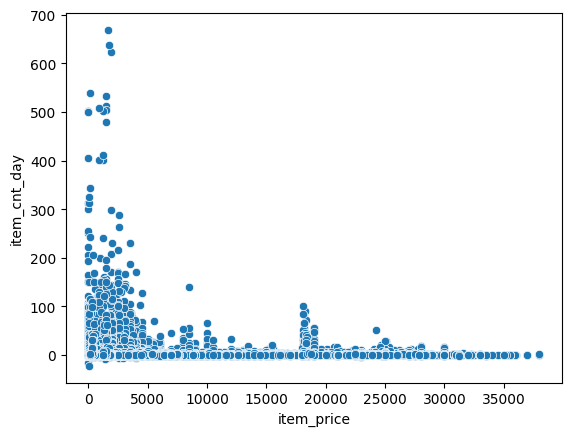

In [ ]:
sns.scatterplot(x=merged_data['item_price'], y=merged_data['item_cnt_day'])

In [ ]:
averaged_price_data = merged_data_addr[['item_id', 'item_name', 'shop_name', 'date_block_num', 'item_cnt_day', 'item_price']].groupby(
    by=['item_id', 'item_name', 'shop_name', 'date_block_num'], as_index=False).agg(
        item_cnt_month=('item_cnt_day', 'sum'), avg_item_price=('item_price', 'mean'))

In [ ]:
averaged_price_data

item_id                                          item_name  \
0              0          ! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.)         D   
1              1  !ABBYY FineReader 12 Professional Edition Full...   
2              1  !ABBYY FineReader 12 Professional Edition Full...   
3              1  !ABBYY FineReader 12 Professional Edition Full...   
4              1  !ABBYY FineReader 12 Professional Edition Full...   
...          ...                                                ...   
1609107    22168                                Яйцо для Little Inu   
1609108    22168                                Яйцо для Little Inu   
1609109    22168                                Яйцо для Little Inu   
1609110    22168                                Яйцо для Little Inu   
1609111    22169                      Яйцо дракона (Игра престолов)   

                        shop_name  date_block_num  item_cnt_month  \
0                 Химки ТЦ "Мега"            20.0             1.0   
1        Цифровой склад 1С-Онлайн            15.0             2.0   
2        Цифровой склад 1С-Онлайн            18.0             1.0   
3        Цифровой склад 1С-Онлайн            19.0             1.0   
4        Цифровой склад 1С-Онлайн            20.0             1.0   
...                           ...             ...             ...   
1609107       Интернет-магазин ЧС             8.0             1.0   
1609108          Коломна ТЦ "Рио"             1.0             1.0   
1609109    СПб ТК "Невский Центр"             1.0             1.0   
1609110           СПб ТК "Сенная"             2.0             1.0   
1609111       Москва ТРК "Атриум"            14.0             1.0   

         avg_item_price  
0                  58.0  
1                4490.0  
2                4490.0  
3                4490.0  
4                4490.0  
...                 ...  
1609107           799.0  
1609108           799.0  
1609109           799.0  
1609110           798.5  
1609111          4349.0  

[1609112 rows x 6 columns]

<Axes: xlabel='avg_item_price', ylabel='item_cnt_month'>

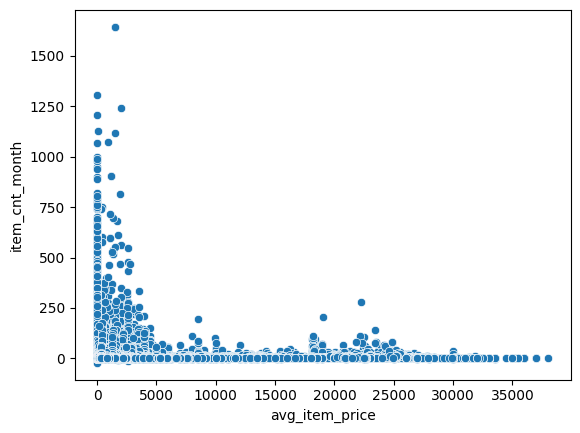

In [ ]:
sns.scatterplot(x=averaged_price_data['avg_item_price'], y=averaged_price_data['item_cnt_month'])

In [ ]:
merged_data.replace({'shop_id': replace_shops_id}, inplace=True)

In [ ]:
merged_data

item_name  item_id  \
0              ! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.)         D        0   
1          ***В ЛУЧАХ СЛАВЫ   (UNV)                    D        2   
2          ***В ЛУЧАХ СЛАВЫ   (UNV)                    D        2   
3        ***ГОЛУБАЯ ВОЛНА  (Univ)                      D        3   
4        ***ГОЛУБАЯ ВОЛНА  (Univ)                      D        3   
...                                                  ...      ...   
2935821                         Манга Врата Штейна Том 1    14957   
2935822                         Манга Врата Штейна Том 1    14957   
2935823                         Манга Врата Штейна Том 1    14957   
2935824                Элемент питания DURACELL LR06-BC2    22088   
2935825                Элемент питания DURACELL LR06-BC2    22088   

         item_category_id      item_category_name        date  date_block_num  \
0                      40              Кино - DVD  01.09.2014            20.0   
1                      40              Кино - DVD  24.08.2014            19.0   
2                      40              Кино - DVD  12.11.2014            22.0   
3                      40              Кино - DVD  05.07.2014            18.0   
4                      40              Кино - DVD  26.08.2014            19.0   
...                   ...                     ...         ...             ...   
2935821                47  Книги - Комиксы, манга  01.10.2015            33.0   
2935822                47  Книги - Комиксы, манга  02.10.2015            33.0   
2935823                47  Книги - Комиксы, манга  03.10.2015            33.0   
2935824                83        Элементы питания  01.10.2015            33.0   
2935825                83        Элементы питания  02.10.2015            33.0   

         shop_id  item_price  item_cnt_day            shop_name  
0           54.0        58.0           1.0      Химки ТЦ "Мега"  
1           54.0        58.0           1.0      Химки ТЦ "Мега"  
2           54.0        58.0           1.0      Химки ТЦ "Мега"  
3           54.0       100.0           1.0      Химки ТЦ "Мега"  
4           54.0        58.0           1.0      Химки ТЦ "Мега"  
...          ...         ...           ...                  ...  
2935821     20.0       299.0           5.0  Москва "Распродажа"  
2935822     20.0       299.0          31.0  Москва "Распродажа"  
2935823     20.0       299.0          14.0  Москва "Распродажа"  
2935824     20.0       119.0           1.0  Москва "Распродажа"  
2935825     20.0       119.0           2.0  Москва "Распродажа"  

[2935826 rows x 10 columns]

Let's look at the price of the best-selling items.

In [ ]:
merged_data.groupby(by=['item_id']).agg(count=('item_name', 'count')).sort_values(by='count', ascending=False).head()

count
item_id       
20949    31339
5822      9408
17717     9067
2808      7479
4181      6853

In [ ]:
merged_data['date'] = pd.to_datetime(merged_data['date'], dayfirst=True)

<Axes: xlabel='date'>

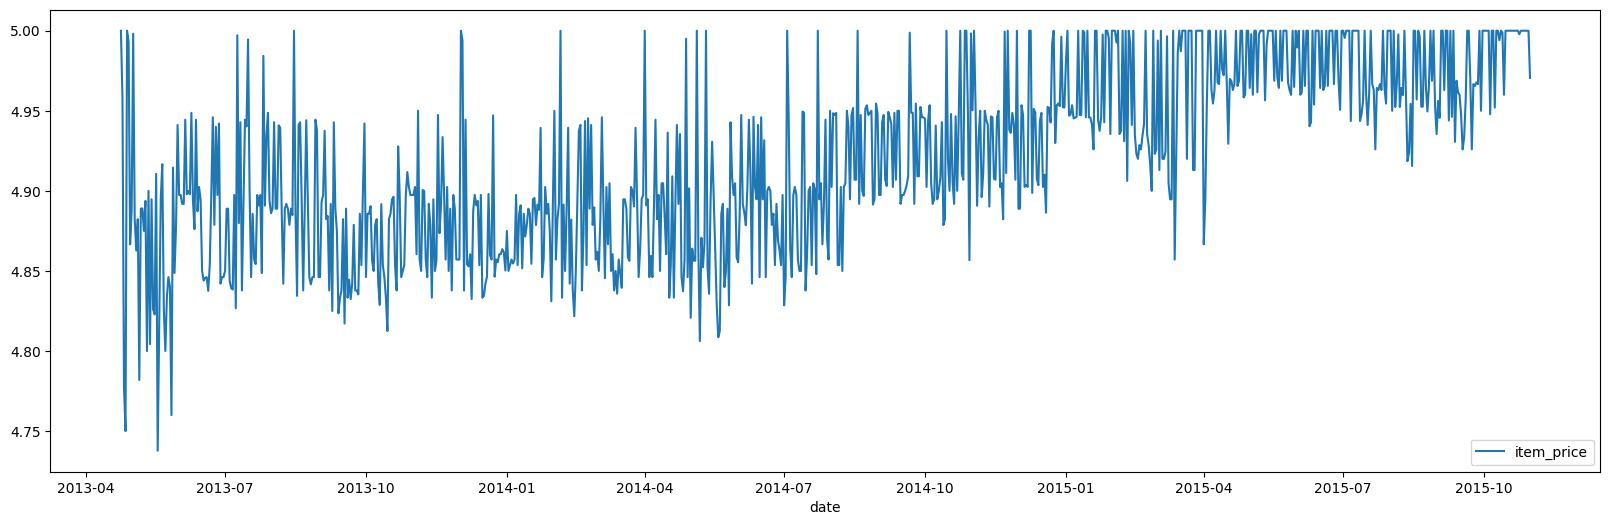

In [ ]:
plt.figure(figsize=(20, 6))

id = 20949
avg_daily_price = merged_data[merged_data['item_id'] == id][['date', 'item_price']].groupby(by=['date']).mean()
avg_daily_price

sns.lineplot(data=avg_daily_price)

In [ ]:
merged_data[merged_data['item_id'] == id][['date', 'shop_id', 'item_price']].groupby(by=['date', 'shop_id'], as_index=False).mean()

date  shop_id  item_price
0     2013-04-24     22.0         5.0
1     2013-04-24     25.0         5.0
2     2013-04-24     26.0         5.0
3     2013-04-24     54.0         5.0
4     2013-04-24     59.0         5.0
...          ...      ...         ...
31334 2015-10-31     50.0         5.0
31335 2015-10-31     52.0         5.0
31336 2015-10-31     53.0         5.0
31337 2015-10-31     56.0         5.0
31338 2015-10-31     59.0         5.0

[31339 rows x 3 columns]

item_id  item_category_id name2 name3
4181     4181                75     0     0

item_name  item_id  \
1225485  Kaspersky Internet Security Multi-Device Russi...     4181   

         item_category_id            item_category_name       date  \
1225485                75  Программы - Для дома и офиса 2014-02-22   

         date_block_num  shop_id  item_price  item_cnt_day  \
1225485            13.0     19.0       999.0           1.0   

                     shop_name  
1225485  Курск ТЦ "Пушкинский"

<Axes: xlabel='date', ylabel='item_price'>

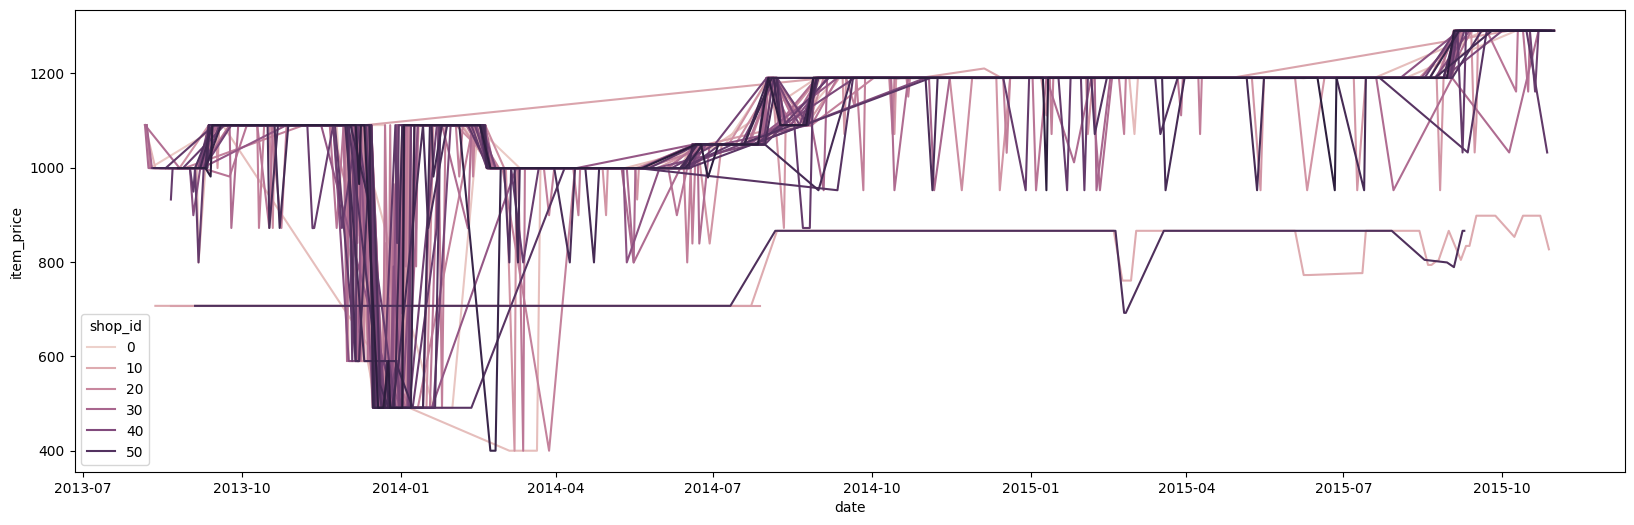

In [ ]:
plt.figure(figsize=(20, 6))

id = 4181
display(items[items['item_id'] == id])
display(merged_data[merged_data['item_id'] == id].sample())

avg_daily_price = merged_data[merged_data['item_id'] == id][['date', 'shop_id', 'item_price']].groupby(by=['date', 'shop_id'], as_index=False).mean()

sns.lineplot(data=avg_daily_price, x='date', y='item_price', hue='shop_id')

In [ ]:
avg_daily_price

date  shop_id  item_price
0    2013-08-06      7.0      1090.0
1    2013-08-06     27.0      1090.0
2    2013-08-06     29.0      1090.0
3    2013-08-07     22.0      1090.0
4    2013-08-07     31.0      1090.0
...         ...      ...         ...
6848 2015-10-31     26.0      1290.0
6849 2015-10-31     31.0      1290.0
6850 2015-10-31     37.0      1290.0
6851 2015-10-31     53.0      1290.0
6852 2015-10-31     59.0      1290.0

[6853 rows x 3 columns]

In [ ]:
avg_daily_price = merged_data[merged_data['item_id'] == id][['date', 'shop_id', 'item_price']].groupby(by=['date', 'shop_id'], as_index=False).mean()

min_date = avg_daily_price['date'].min()
max_date = avg_daily_price['date'].max()

unique_shops = avg_daily_price['shop_id'].unique()
dates = pd.date_range(start=min_date, end=max_date, freq='D')

shop_date_combinations = pd.DataFrame(list(itertools.product(unique_shops, dates)), columns=['shop_id', 'date'])

avg_daily_price = shop_date_combinations.merge(avg_daily_price, on=['shop_id', 'date'], how='left')

In [ ]:
avg_daily_price

shop_id       date  item_price
0          7.0 2013-08-06      1090.0
1          7.0 2013-08-07         NaN
2          7.0 2013-08-08         NaN
3          7.0 2013-08-09         NaN
4          7.0 2013-08-10         NaN
...        ...        ...         ...
40845     36.0 2015-10-27         NaN
40846     36.0 2015-10-28         NaN
40847     36.0 2015-10-29         NaN
40848     36.0 2015-10-30         NaN
40849     36.0 2015-10-31         NaN

[40850 rows x 3 columns]

In [ ]:
interpolated_daily_price = avg_daily_price.drop(columns='item_price').merge(avg_daily_price['item_price'].interpolate(), left_index=True, right_index=True)

<Axes: xlabel='date', ylabel='item_price'>

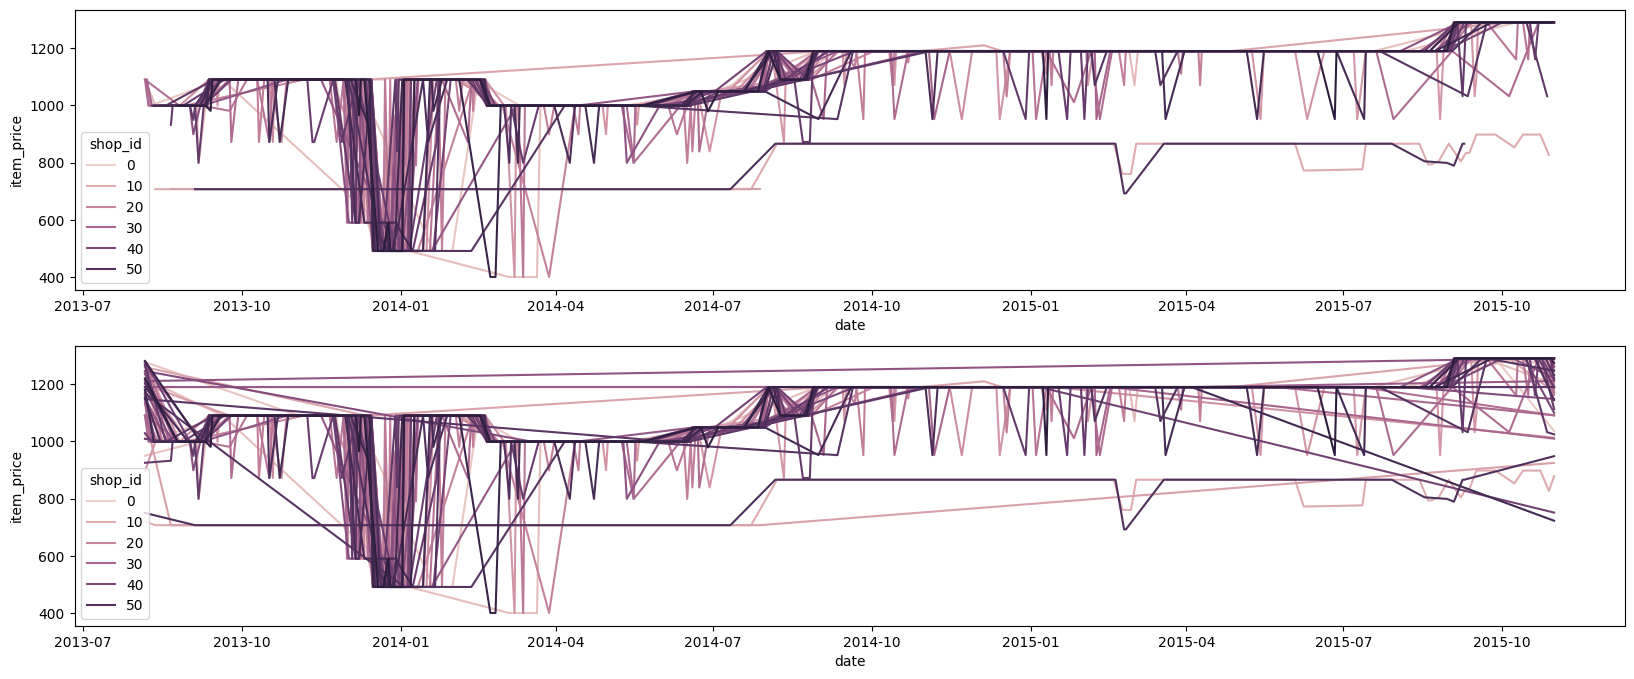

In [ ]:
plt.figure(figsize=(20, 8))

avg_daily_price = merged_data[merged_data['item_id'] == id][['date', 'shop_id', 'item_price']].groupby(by=['date', 'shop_id'], as_index=False).mean()

plt.subplot(2, 1, 1)
sns.lineplot(data=avg_daily_price, x='date', y='item_price', hue='shop_id')

plt.subplot(2, 1, 2)
sns.lineplot(data=interpolated_daily_price, x='date', y='item_price', hue='shop_id')

In [ ]:
np.sort(avg_daily_price['shop_id'].unique())

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7., 10., 12., 13., 14., 15.,
       16., 17., 18., 19., 21., 22., 24., 25., 26., 27., 28., 29., 30.,
       31., 33., 34., 35., 36., 37., 38., 39., 41., 42., 43., 44., 45.,
       46., 47., 48., 49., 50., 51., 52., 53., 54., 56., 59.])

In [ ]:
avg_daily_price[avg_daily_price['shop_id'] == 6]

date  shop_id  item_price
20   2013-08-15      6.0       999.0
32   2013-08-20      6.0       999.0
48   2013-08-23      6.0       999.0
95   2013-08-30      6.0       999.0
108  2013-08-31      6.0       999.0
...         ...      ...         ...
6760 2015-10-17      6.0      1290.0
6767 2015-10-18      6.0      1290.0
6785 2015-10-20      6.0      1290.0
6811 2015-10-24      6.0      1290.0
6818 2015-10-25      6.0      1290.0

[328 rows x 3 columns]

<Axes: xlabel='date', ylabel='item_price'>

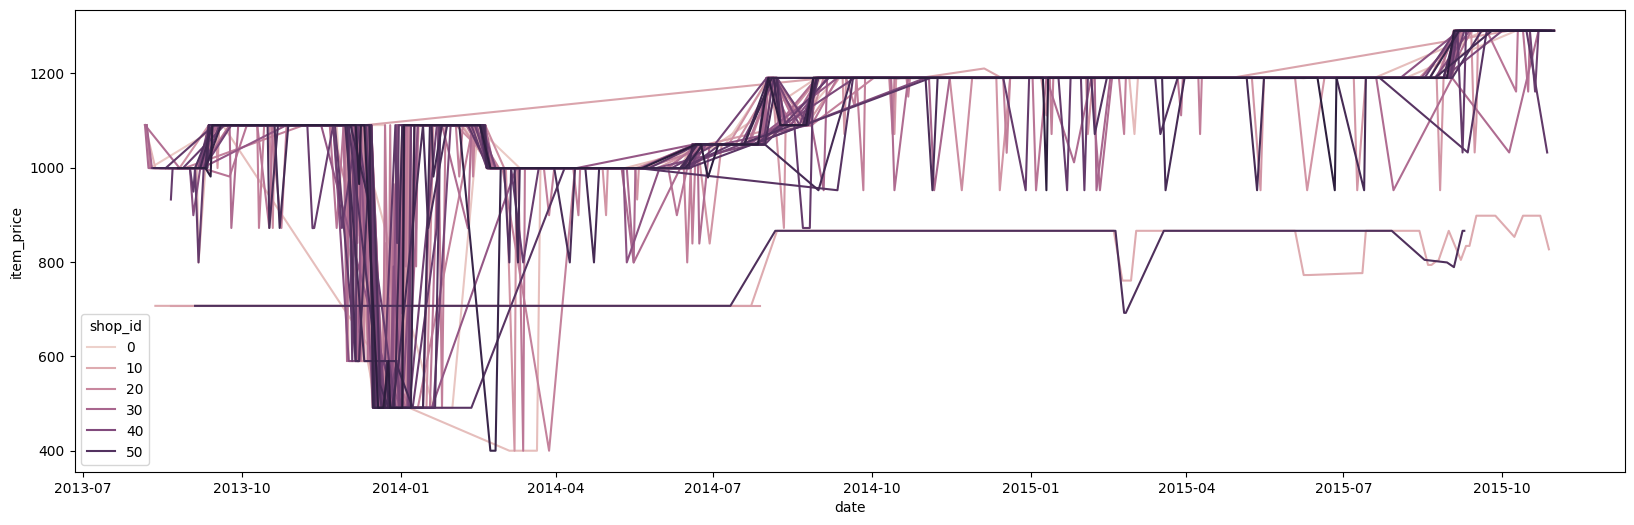

In [ ]:
plt.figure(figsize=(20, 6))

sns.lineplot(data=avg_daily_price, x='date', y='item_price', hue='shop_id')

In [ ]:
avg_daily_price

date  shop_id  item_price
0    2013-08-06      7.0      1090.0
1    2013-08-06     27.0      1090.0
2    2013-08-06     29.0      1090.0
3    2013-08-07     22.0      1090.0
4    2013-08-07     31.0      1090.0
...         ...      ...         ...
6848 2015-10-31     26.0      1290.0
6849 2015-10-31     31.0      1290.0
6850 2015-10-31     37.0      1290.0
6851 2015-10-31     53.0      1290.0
6852 2015-10-31     59.0      1290.0

[6853 rows x 3 columns]

In [ ]:
next(merged_data.itertuples())

Pandas(Index=0, item_name='! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.)         D', item_id=0, item_category_id=40, item_category_name='Кино - DVD', date=Timestamp('2014-09-01 00:00:00'), date_block_num=20.0, shop_id=54.0, item_price=58.0, item_cnt_day=1.0, shop_name='Химки ТЦ "Мега"')

In [ ]:
avg_daily_price.groupby('shop_id').resample('1d', on='date').count().reset_index(1).drop(columns='shop_id').groupby('shop_id').count()


date  item_price
shop_id                  
0.0       793         793
1.0       787         787
2.0       780         780
3.0       706         706
4.0       786         786
5.0       732         732
6.0       802         802
7.0       811         811
10.0      808         808
12.0      663         663
13.0      342         342
14.0      763         763
15.0      808         808
16.0      807         807
17.0      507         507
18.0      780         780
19.0      807         807
21.0      793         793
22.0      814         814
24.0      807         807
25.0      796         796
26.0      800         800
27.0      705         705
28.0      801         801
29.0      656         656
30.0      546         546
31.0      816         816
33.0      199         199
34.0      190         190
35.0      760         760
36.0        1           1
37.0      804         804
38.0      799         799
39.0      507         507
41.0      794         794
42.0      792         792
43.0      493         493
44.0      796         796
45.0      811         811
46.0      793         793
47.0      801         801
48.0      452         452
49.0      628         628
50.0      793         793
51.0      736         736
52.0      797         797
53.0      792         792
54.0      602         602
56.0      783         783
59.0      798         798

In [ ]:
avg_daily_price

date  shop_id  item_price
0    2013-08-06      7.0      1090.0
1    2013-08-06     27.0      1090.0
2    2013-08-06     29.0      1090.0
3    2013-08-07     22.0      1090.0
4    2013-08-07     31.0      1090.0
...         ...      ...         ...
6848 2015-10-31     26.0      1290.0
6849 2015-10-31     31.0      1290.0
6850 2015-10-31     37.0      1290.0
6851 2015-10-31     53.0      1290.0
6852 2015-10-31     59.0      1290.0

[6853 rows x 3 columns]

item_id  item_category_id name2 name3
17717    17717                79     0     0

item_name  item_id  item_category_id  \
1074316  Прием денежных средств для 1С-Онлайн    17717                79   

        item_category_name       date  date_block_num  shop_id  item_price  \
1074316          Служебные 2015-02-13            25.0     59.0      1090.0   

         item_cnt_day               shop_name  
1074316           1.0  Ярославль ТЦ "Альтаир"

<Axes: xlabel='date'>

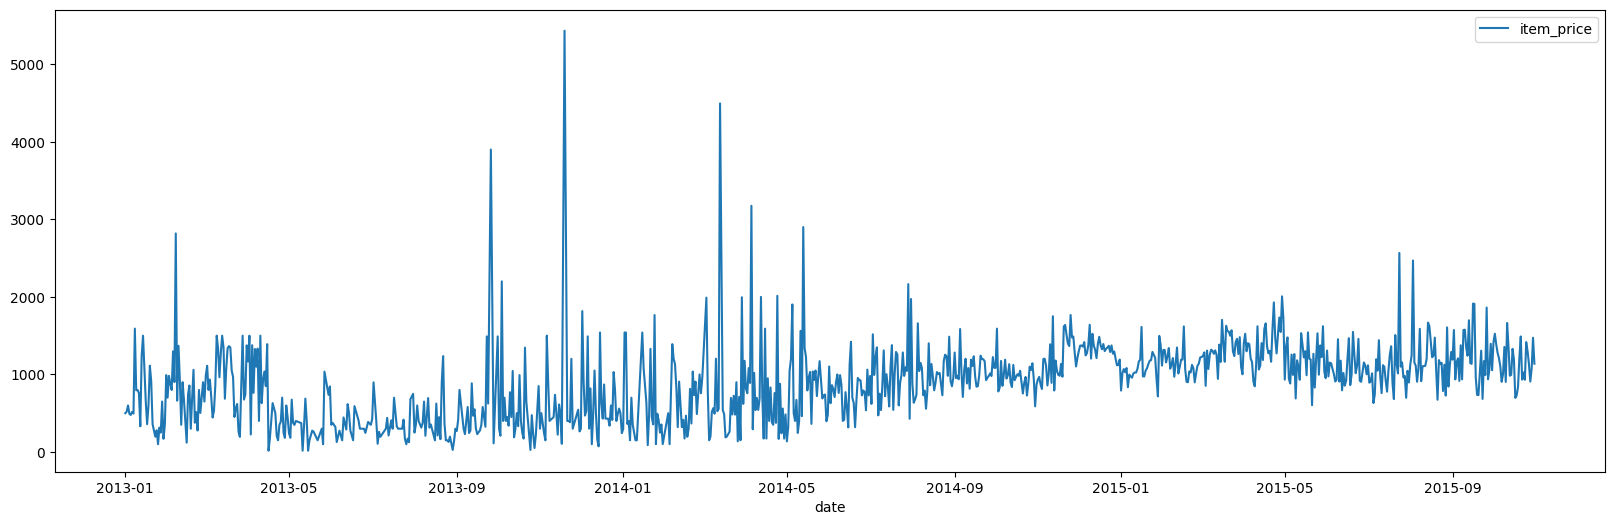

In [ ]:
plt.figure(figsize=(20, 6))

id = 17717
display(items[items['item_id'] == id])
display(merged_data[merged_data['item_id'] == id].sample())

avg_daily_price = merged_data[merged_data['item_id'] == id][['date', 'item_price']].groupby(by=['date']).mean()
avg_daily_price

sns.lineplot(data=avg_daily_price)

In [ ]:
len(data['sales_train']['item_id'].unique()), len(data['items']['item_id'].unique())

(21802, 22170)

There are items in `items` that weren't sold anywhere.

### Join all data

In [ ]:
merged_data

item_name  item_id  \
0              ! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.)         D        0   
1          ***В ЛУЧАХ СЛАВЫ   (UNV)                    D        2   
2          ***В ЛУЧАХ СЛАВЫ   (UNV)                    D        2   
3        ***ГОЛУБАЯ ВОЛНА  (Univ)                      D        3   
4        ***ГОЛУБАЯ ВОЛНА  (Univ)                      D        3   
...                                                  ...      ...   
2935821                         Манга Врата Штейна Том 1    14957   
2935822                         Манга Врата Штейна Том 1    14957   
2935823                         Манга Врата Штейна Том 1    14957   
2935824                Элемент питания DURACELL LR06-BC2    22088   
2935825                Элемент питания DURACELL LR06-BC2    22088   

         item_category_id      item_category_name       date  date_block_num  \
0                      40              Кино - DVD 2014-09-01            20.0   
1                      40              Кино - DVD 2014-08-24            19.0   
2                      40              Кино - DVD 2014-11-12            22.0   
3                      40              Кино - DVD 2014-07-05            18.0   
4                      40              Кино - DVD 2014-08-26            19.0   
...                   ...                     ...        ...             ...   
2935821                47  Книги - Комиксы, манга 2015-10-01            33.0   
2935822                47  Книги - Комиксы, манга 2015-10-02            33.0   
2935823                47  Книги - Комиксы, манга 2015-10-03            33.0   
2935824                83        Элементы питания 2015-10-01            33.0   
2935825                83        Элементы питания 2015-10-02            33.0   

         shop_id  item_price  item_cnt_day            shop_name  
0           54.0        58.0           1.0      Химки ТЦ "Мега"  
1           54.0        58.0           1.0      Химки ТЦ "Мега"  
2           54.0        58.0           1.0      Химки ТЦ "Мега"  
3           54.0       100.0           1.0      Химки ТЦ "Мега"  
4           54.0        58.0           1.0      Химки ТЦ "Мега"  
...          ...         ...           ...                  ...  
2935821     20.0       299.0           5.0  Москва "Распродажа"  
2935822     20.0       299.0          31.0  Москва "Распродажа"  
2935823     20.0       299.0          14.0  Москва "Распродажа"  
2935824     20.0       119.0           1.0  Москва "Распродажа"  
2935825     20.0       119.0           2.0  Москва "Распродажа"  

[2935826 rows x 10 columns]

In [ ]:
rare_values_name2 = items['name2'].value_counts()[items['name2'].value_counts() < 2].keys()
rare_values_name3 = items['name3'].value_counts()[items['name3'].value_counts() < 2].keys()

In [ ]:
items['name2'] = items['name2'].replace(rare_values_name2, 'other')
items['name3'] = items['name3'].replace(rare_values_name3, 'other')

In [ ]:
data['sales_train'][data['sales_train']['shop_id'] == 57]

date  date_block_num  shop_id  item_id  item_price  \
259652   09.03.2013               2       57     4164       999.0   
259653   06.03.2013               2       57     4164       999.0   
259654   29.03.2013               2       57     4163      1590.0   
259655   23.03.2013               2       57     4163      1590.0   
259656   22.03.2013               2       57     4163      1590.0   
...             ...             ...      ...      ...         ...   
2901214  07.10.2015              33       57    21881       299.0   
2901215  11.10.2015              33       57    21881       299.0   
2901216  06.10.2015              33       57    22001       169.0   
2901217  17.10.2015              33       57    22001       169.0   
2901218  28.10.2015              33       57    22001       169.0   

         item_cnt_day  
259652            1.0  
259653            1.0  
259654            2.0  
259655            1.0  
259656            2.0  
...               ...  
2901214           1.0  
2901215           1.0  
2901216           1.0  
2901217           2.0  
2901218           1.0  

[117428 rows x 6 columns]

In [ ]:
data['sales_train'][['date_block_num', 'shop_id', 'item_id', 'item_price', 'item_cnt_day']].describe()

date_block_num       shop_id       item_id    item_price  item_cnt_day
count    2.935826e+06  2.935826e+06  2.935826e+06  2.935826e+06  2.935826e+06
mean     1.456986e+01  3.300180e+01  1.019722e+04  8.905556e+02  1.241564e+00
std      9.422956e+00  1.622697e+01  6.324303e+03  1.717984e+03  2.217643e+00
min      0.000000e+00  0.000000e+00  0.000000e+00  7.000000e-02 -2.200000e+01
25%      7.000000e+00  2.200000e+01  4.476000e+03  2.490000e+02  1.000000e+00
50%      1.400000e+01  3.100000e+01  9.343000e+03  3.990000e+02  1.000000e+00
75%      2.300000e+01  4.700000e+01  1.568400e+04  9.990000e+02  1.000000e+00
max      3.300000e+01  5.900000e+01  2.216900e+04  3.799100e+04  6.690000e+02

In [ ]:
month_sales = data['sales_train'][['date_block_num', 'shop_id', 'item_id', 'item_price', 'item_cnt_day']]
month_sales['shop_id'] = month_sales['shop_id'].replace(replace_shops_id)
month_sales = month_sales.groupby(by=['date_block_num', 'shop_id', 'item_id']).agg(avg_price=('item_price', 'mean'), item_cnt_month=('item_cnt_day', 'sum'))
month_sales = month_sales.reset_index(level=[1, 2])

<ipython-input-30-46d21ac8b9e3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month_sales['shop_id'] = month_sales['shop_id'].replace(replace_shops_id)


In [ ]:
month_sales.dtypes

shop_id             int64
item_id             int64
avg_price         float64
item_cnt_month    float64
dtype: object

In [ ]:
month_sales['shop_id'] = month_sales['shop_id'].astype(np.int8)
month_sales['item_id'] = month_sales['item_id'].astype(np.int16)
month_sales['avg_price'] = month_sales['avg_price'].astype(np.float16)
month_sales['item_cnt_month'] = month_sales['item_cnt_month'].astype(np.float16)

In [ ]:
np.sort(month_sales['shop_id'].unique())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 59])

In [ ]:
items

item_id  item_category_id               name2                name3
0            0                40                   0                other
1            1                76  pc цифровая версия                    0
2            2                40                   0                other
3            3                40                   0                other
4            4                40                   0                other
...        ...               ...                 ...                  ...
22165    22165                31  pc цифровая версия                    0
22166    22166                54     цифровая версия                    0
22167    22167                49                   0   cd хрусталева е ю 
22168    22168                62                   0                    0
22169    22169                69                   0      игра престолов 

[22170 rows x 4 columns]

In [ ]:
month_sales

shop_id  item_id  avg_price  item_cnt_month
date_block_num                                             
0                     0       32      221.0             6.0
0                     0       33      347.0             3.0
0                     0       35      247.0             1.0
0                     0       43      221.0             1.0
0                     0       51      128.5             2.0
...                 ...      ...        ...             ...
33                   59    22087      119.0             6.0
33                   59    22088      119.0             2.0
33                   59    22091      179.0             1.0
33                   59    22100      629.0             1.0
33                   59    22102     1250.0             1.0

[1609112 rows x 4 columns]

In [ ]:
address

city              type
0         Якутск           Магазин
1         Якутск                ТЦ
2         Адыгея                ТЦ
3       Балашиха               ТРК
4       Волжский                ТЦ
5        Вологда               ТРЦ
6        Воронеж           Магазин
7        Воронеж               ТРЦ
8        Воронеж               ТРЦ
9                          Магазин
10     Жуковский           Магазин
11     Жуковский           Магазин
12      Интернет  Интернет-магазин
13        Казань                ТЦ
14        Казань                ТЦ
15        Калуга               ТРЦ
16       Коломна                ТЦ
17    Красноярск                ТЦ
18    Красноярск                ТЦ
19         Курск                ТЦ
20        Москва           Магазин
21        Москва               ТРЦ
22        Москва           Магазин
23        Москва                ТК
24        Москва                ТК
25        Москва               ТРК
26        Москва                ТЦ
27        Москва                ТЦ
28        Москва                ТЦ
29        Москва                ТЦ
30        Москва                ТЦ
31        Москва                ТЦ
32        Москва                ТЦ
33        Мытищи               ТРК
34      Новгород               ТРЦ
35      Новгород               ТРЦ
36   Новосибирск               ТРЦ
37   Новосибирск                ТЦ
38          Омск                ТЦ
39  РостовНаДону               ТРК
40  РостовНаДону               ТРК
41  РостовНаДону                ТЦ
42           СПб                ТК
43           СПб                ТК
44        Самара                ТЦ
45        Самара                ТЦ
46  СергиевПосад                ТЦ
47        Сургут               ТРЦ
48         Томск               ТРЦ
49        Тюмень               ТРЦ
50        Тюмень                ТЦ
51        Тюмень                ТЦ
52           Уфа                ТК
53           Уфа                ТЦ
54         Химки                ТЦ
55      Интернет  Интернет-магазин
56         Чехов               ТРЦ
57        Якутск           Магазин
58        Якутск                ТЦ
59     Ярославль                ТЦ

In [ ]:
shop_item_combinations = pd.DataFrame(list(itertools.product(address.index.delete(list(replace_shops_id.keys())), items['item_id'])), columns=['shop_id', 'item_id'])

In [ ]:
shop_item_combinations.dtypes

shop_id    int64
item_id    int64
dtype: object

In [ ]:
shop_item_combinations['shop_id'] = shop_item_combinations['shop_id'].astype(np.int8)
shop_item_combinations['item_id'] = shop_item_combinations['item_id'].astype(np.int16)

In [ ]:
month_sales.loc[0]

shop_id  item_id  avg_price  item_cnt_month
date_block_num                                             
0                     0       32      221.0             6.0
0                     0       33      347.0             3.0
0                     0       35      247.0             1.0
0                     0       43      221.0             1.0
0                     0       51      128.5             2.0
...                 ...      ...        ...             ...
0                    59    22092      109.0             2.0
0                    59    22130      349.0             2.0
0                    59    22134      399.0             2.0
0                    59    22151      399.0             2.0
0                    59    22154      999.0             1.0

[63224 rows x 4 columns]

In [ ]:
month_sales.dtypes

shop_id             int64
item_id             int64
avg_price         float64
item_cnt_month    float64
city               object
type               object
dtype: object

In [ ]:
shop_item_combinations

shop_id  item_id
0              0        0
1              0        1
2              0        2
3              0        3
4              0        4
...          ...      ...
1263685       59    22165
1263686       59    22166
1263687       59    22167
1263688       59    22168
1263689       59    22169

[1263690 rows x 2 columns]

In [ ]:
np.sort(shop_item_combinations['shop_id'].unique())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 59])

In [ ]:
unique_shops = data['shops']

month_frames = [month_sales.loc[i].reset_index().rename(columns={'index': 'date_block_num'}).merge(shop_item_combinations, how='outer', on=['shop_id', 'item_id']) for i in range(month_sales.index.max() + 1)]


In [ ]:
month_frames[0].dtypes

date_block_num    float64
shop_id              int8
item_id             int16
avg_price         float16
item_cnt_month    float16
dtype: object

In [ ]:
# fill NaNs in `item_cnt_month` with 0
for i in range(len(month_frames)):
  month_frames[i]['date_block_num'] = month_frames[i]['date_block_num'].astype(np.float16)
  month_frames[i]['date_block_num'].fillna(i, inplace=True)
  month_frames[i]['item_cnt_month'].fillna(0, inplace=True)

In [ ]:
month_frames[0]

date_block_num  shop_id  item_id  avg_price  item_cnt_month
0                   0.0        0       32      221.0             6.0
1                   0.0        0       33      347.0             3.0
2                   0.0        0       35      247.0             1.0
3                   0.0        0       43      221.0             1.0
4                   0.0        0       51      128.5             2.0
...                 ...      ...      ...        ...             ...
1263685             0.0       59    22165        NaN             0.0
1263686             0.0       59    22166        NaN             0.0
1263687             0.0       59    22167        NaN             0.0
1263688             0.0       59    22168        NaN             0.0
1263689             0.0       59    22169        NaN             0.0

[1263690 rows x 5 columns]

In [ ]:
month_data = pd.concat(month_frames, ignore_index=True)
del month_frames
month_data

date_block_num  shop_id  item_id  avg_price  item_cnt_month
0                    0.0        0       32      221.0             6.0
1                    0.0        0       33      347.0             3.0
2                    0.0        0       35      247.0             1.0
3                    0.0        0       43      221.0             1.0
4                    0.0        0       51      128.5             2.0
...                  ...      ...      ...        ...             ...
42965455            33.0       59    22165        NaN             0.0
42965456            33.0       59    22166        NaN             0.0
42965457            33.0       59    22167        NaN             0.0
42965458            33.0       59    22168        NaN             0.0
42965459            33.0       59    22169        NaN             0.0

[42965460 rows x 5 columns]

In [ ]:
display(month_data['date_block_num'].isna().any())
display(month_data['shop_id'].isna().any())
display(month_data['item_id'].isna().any())
display(month_data['avg_price'].isna().any())
display(month_data['item_cnt_month'].isna().any())

False

False

False

True

False

Let's add `revenue` feature that is a product of `avg_price` and `item_cnt_month`. Filling missing values in it with 0 is more reasonable as even we don't know the price of an item, as this item was sold 0 times, we can say that revenue from this item was 0.

As it contains information about target, it may lead to the target leakage. So we won't use it directly. We can aggregate it and make monthly revenue of a shop, add lag features for item revenue.

In [ ]:
month_data['avg_price'].fillna(0, inplace=True)
month_data['item_revenue'] = month_data['avg_price'].astype(np.float64) * month_data['item_cnt_month'].astype(np.float64)
month_data['shop_month_revenue'] = month_data[['date_block_num', 'shop_id', 'item_revenue']].astype(np.float64).groupby(['date_block_num', 'shop_id'], as_index=False)['item_revenue'].transform('sum')
month_data['shop_month_revenue'] = month_data['shop_month_revenue'].astype(np.float32)

Let's create `relative_delta_revenue` to track the trend.

In [ ]:
month_data['avg_item_revenue'] = month_data.groupby(['shop_id', 'item_id']).transform('mean')['item_revenue']
month_data['relative_delta_revenue'] = (month_data['item_revenue'] - month_data['avg_item_revenue']) / month_data['avg_item_revenue']

In [ ]:
month_data['relative_delta_revenue'].fillna(0, inplace=True)
month_data.replace([np.inf], 0, inplace=True)

In [ ]:
month_data['item_revenue'] = month_data['item_revenue'].astype(np.float32)
month_data['avg_item_revenue'] = month_data['avg_item_revenue'].astype(np.float32)
month_data['relative_delta_revenue'] = month_data['relative_delta_revenue'].astype(np.float16)

In [ ]:
month_data['avg_shop_month_revenue'] = month_data.groupby(['shop_id', 'item_id']).transform('mean')['shop_month_revenue']
month_data['relative_shop_delta_revenue'] = (month_data['shop_month_revenue'] - month_data['avg_shop_month_revenue']) / month_data['avg_shop_month_revenue']

In [ ]:
month_data['relative_shop_delta_revenue'] = month_data['relative_shop_delta_revenue'].astype(np.float16)

In [ ]:
month_data.drop(columns=['avg_item_revenue', 'avg_shop_month_revenue'], inplace=True)

In [ ]:
month_data

date_block_num  shop_id  item_id  avg_price  item_cnt_month  \
0                    0.0        0       32      221.0             6.0   
1                    0.0        0       33      347.0             3.0   
2                    0.0        0       35      247.0             1.0   
3                    0.0        0       43      221.0             1.0   
4                    0.0        0       51      128.5             2.0   
...                  ...      ...      ...        ...             ...   
42965455            33.0       59    22165        0.0             0.0   
42965456            33.0       59    22166        0.0             0.0   
42965457            33.0       59    22167        0.0             0.0   
42965458            33.0       59    22168        0.0             0.0   
42965459            33.0       59    22169        0.0             0.0   

          item_revenue  shop_month_revenue  relative_delta_revenue  \
0               1326.0         2966101.000                0.976562   
1               1041.0         2966101.000                2.667969   
2                247.0         2966101.000                0.584473   
3                221.0         2966101.000               12.250000   
4                257.0         2966101.000                0.310547   
...                ...                 ...                     ...   
42965455           0.0          972724.625                0.000000   
42965456           0.0          972724.625                0.000000   
42965457           0.0          972724.625               -1.000000   
42965458           0.0          972724.625                0.000000   
42965459           0.0          972724.625                0.000000   

          relative_shop_delta_revenue  shop_month_revenue_lag_1  \
0                           -0.157959                       NaN   
1                           -0.157959                       NaN   
2                           -0.157959                       NaN   
3                           -0.157959                       NaN   
4                           -0.157959                       NaN   
...                               ...                       ...   
42965455                    -0.270752                       0.0   
42965456                    -0.270752                       0.0   
42965457                    -0.270752                       0.0   
42965458                    -0.270752                       0.0   
42965459                    -0.270752                       0.0   

          shop_month_revenue_lag_4  shop_month_revenue_lag_12  \
0                              NaN                        NaN   
1                              NaN                        NaN   
2                              NaN                        NaN   
3                              NaN                        NaN   
4                              NaN                        NaN   
...                            ...                        ...   
42965455                       0.0                  4502273.0   
42965456                       0.0                  4502273.0   
42965457                       0.0                  4502273.0   
42965458                       0.0                  4502273.0   
42965459                       0.0                  4502273.0   

          relative_shop_delta_revenue_lag_1  \
0                                       NaN   
1                                       NaN   
2                                       NaN   
3                                       NaN   
4                                       NaN   
...                                     ...   
42965455                               -1.0   
42965456                               -1.0   
42965457                               -1.0   
42965458                               -1.0   
42965459                               -1.0   

          relative_shop_delta_revenue_lag_4  \
0                                       NaN   
1                                       NaN   


In [ ]:
gc.collect()

48

#### Lag features

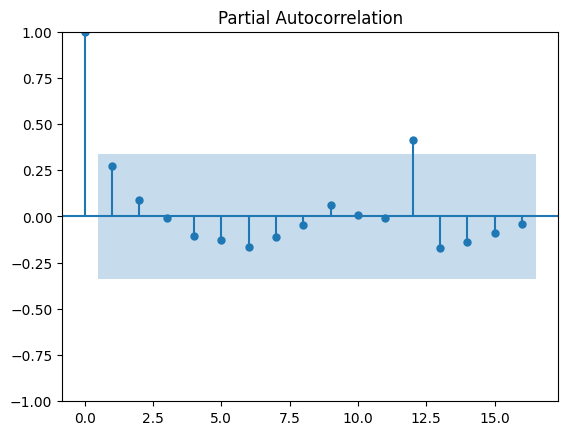

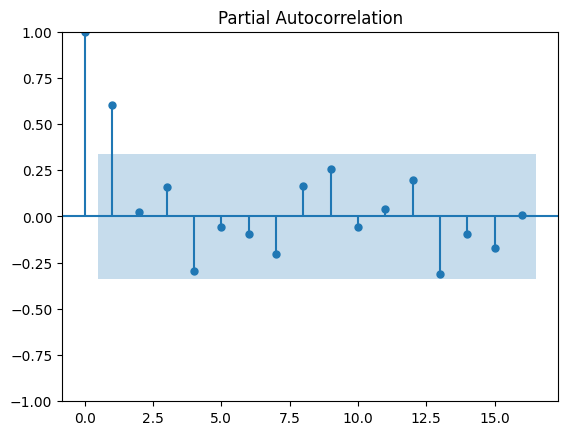

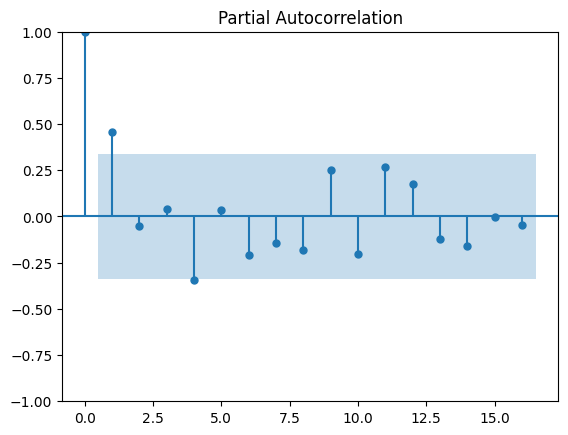

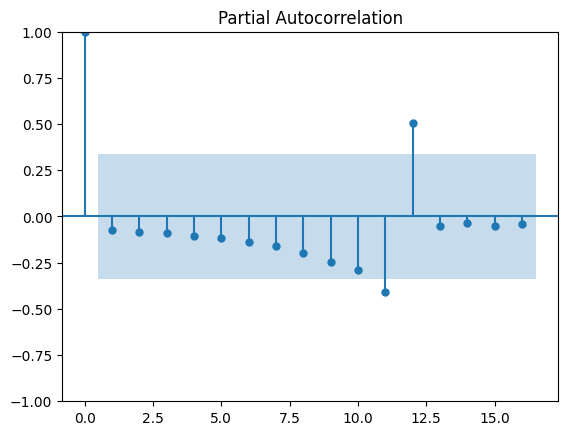

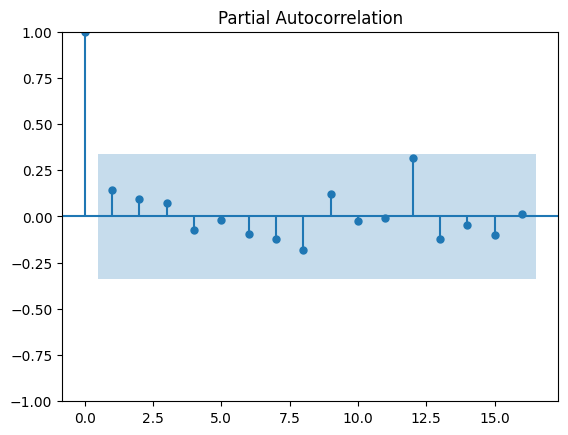

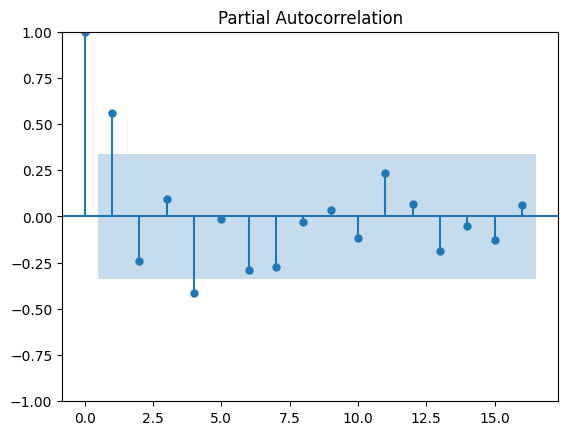

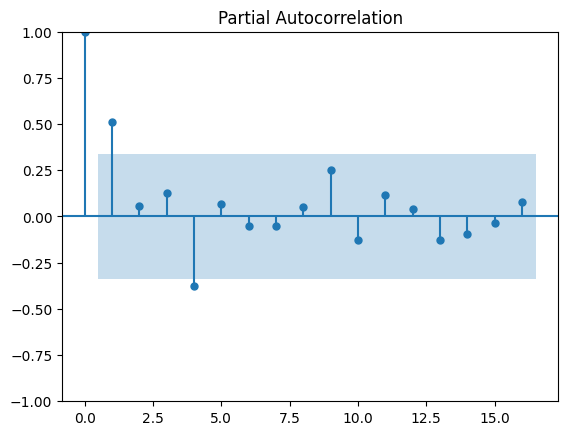

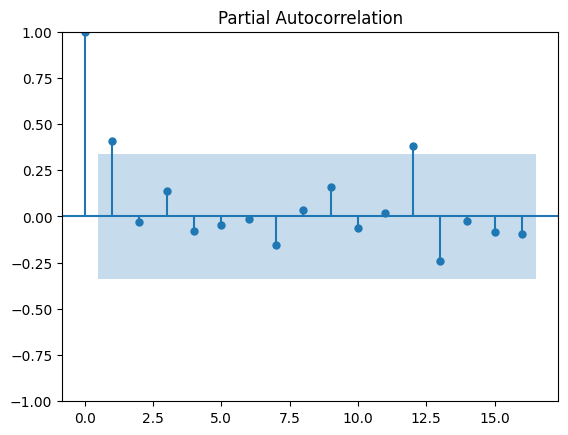

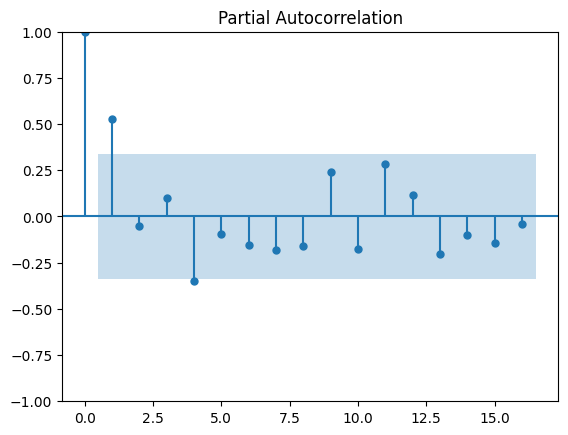

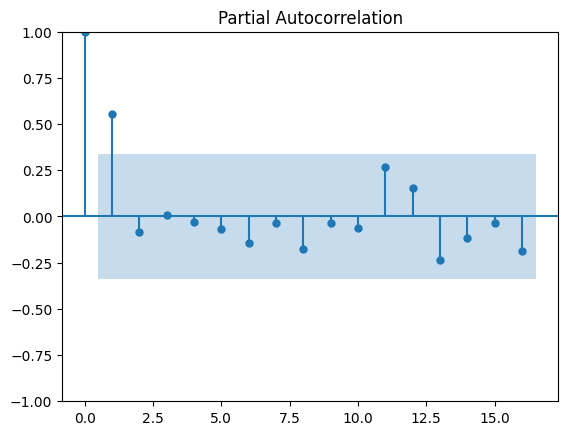

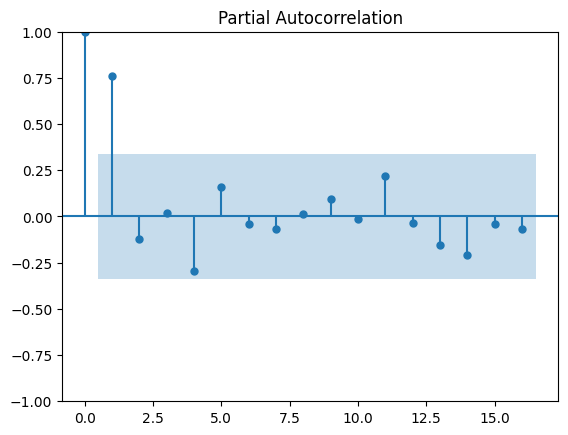

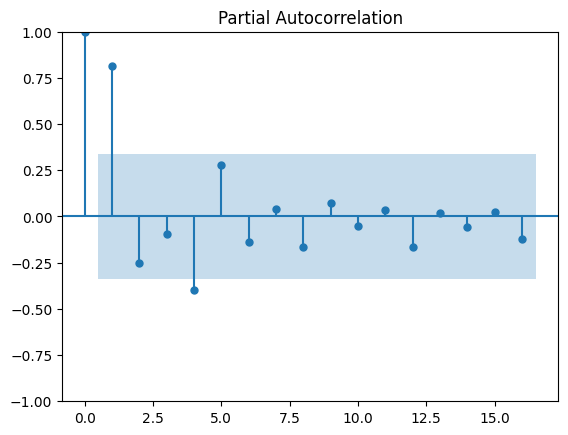

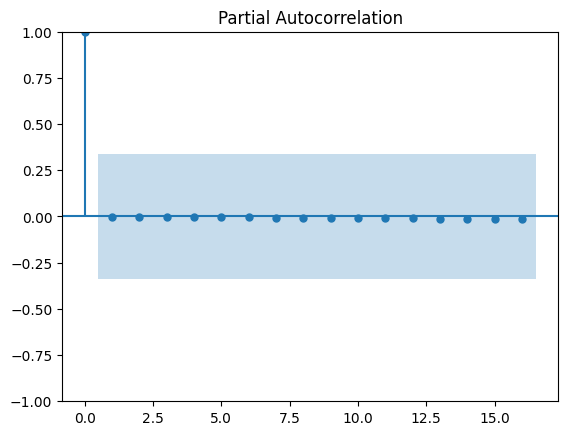

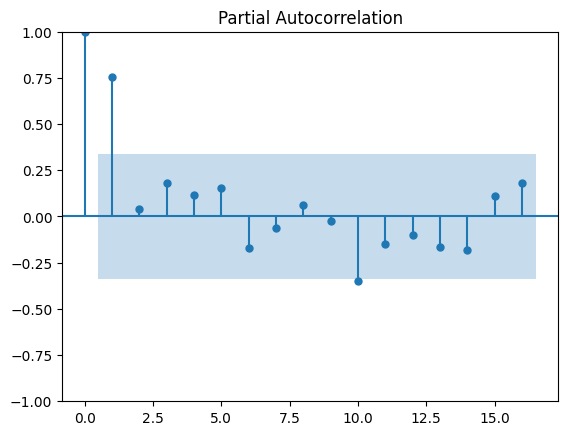

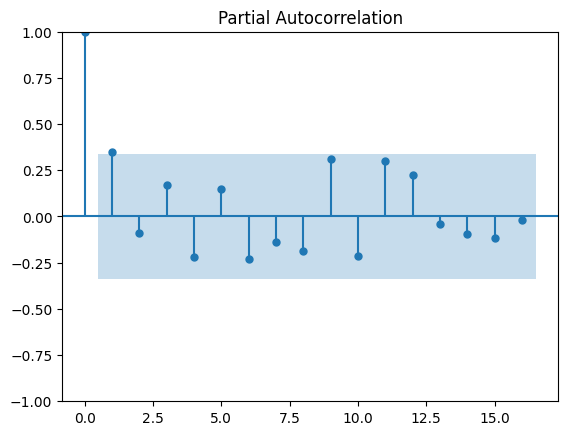

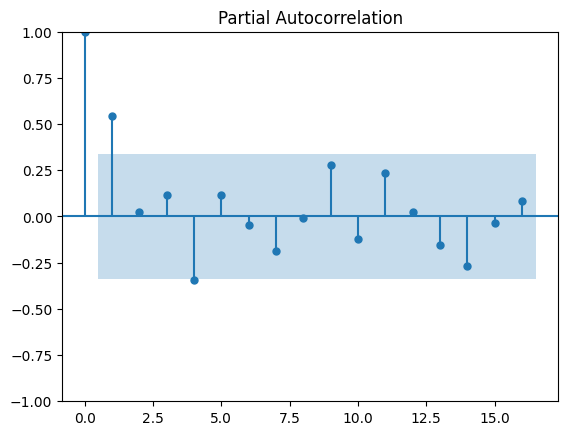

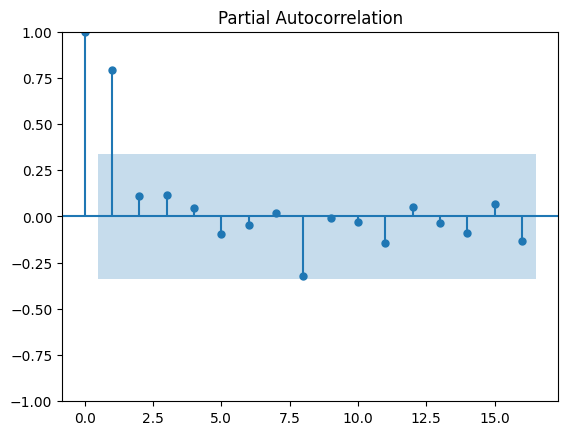

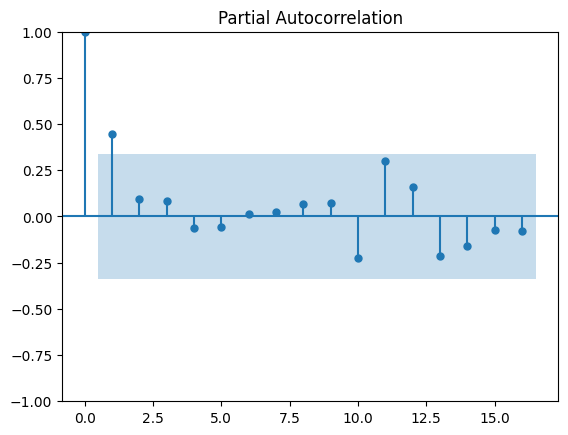

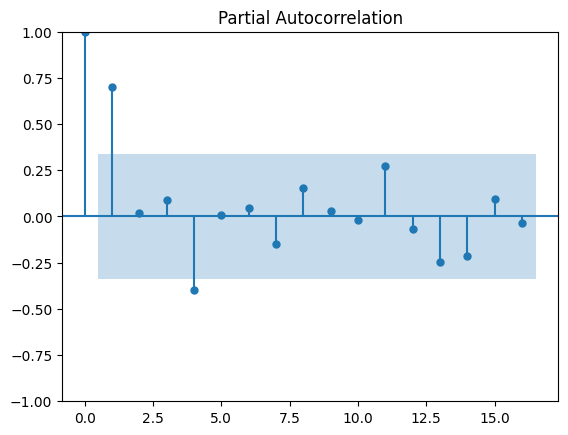

In [ ]:
group = month_data[['date_block_num', 'shop_id', 'shop_month_revenue']].astype(np.float32).groupby(['shop_id', 'date_block_num'])
for shop_id in range(0, 55, 3):
  plot_pacf(group.mean('shop_month_revenue').xs(shop_id))

We can see that the most correlated lags are 1, 4, 12.

In [ ]:
def collect(func):
  def inner(*args, **kwargs):
    result = func(*args, **kwargs)
    gc.collect()
    return result
  return inner

In [ ]:
@collect
def create_lags(df, groupby, column, lags):
  group = df[groupby + [column]].astype(np.float32).groupby(groupby).mean().groupby(level=0)
  for lag in lags:
    m = group.shift(lag).rename(columns={column: f'{column}_lag_{lag}'}).reset_index()
    month_data[f'{column}_lag_{lag}'] = month_data.merge(m, on=groupby)[f'{column}_lag_{lag}']
    gc.collect()

In [ ]:
create_lags(month_data, groupby=['shop_id', 'date_block_num'], column='shop_month_revenue', lags=[1, 4, 12])

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1490: ValueWarning: Matrix is singular. Using pinv.
  warnings.warn("Matrix is singular. Using pinv.", ValueWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1490: ValueWarning: Matrix is singular. Using pinv.
  warnings.warn("Matrix is singular. Using pinv.", ValueWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1490: ValueWarning: Matrix is singular. Using pinv.
  warnings.warn("Matrix is singular. Using pinv.", ValueWarning)


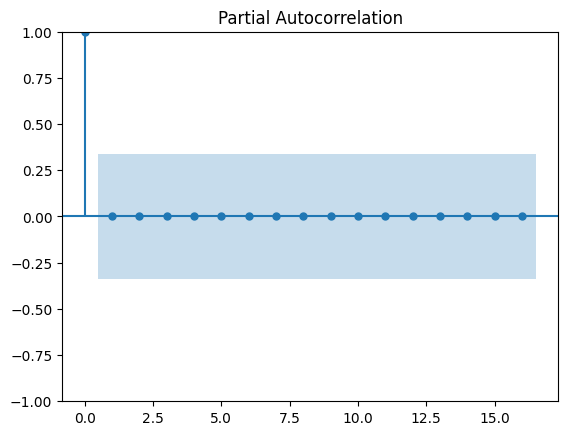

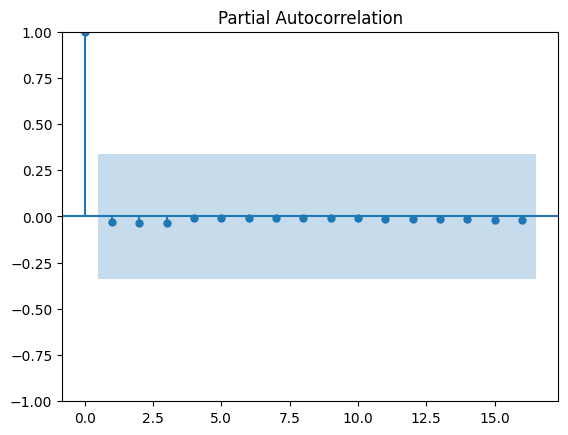

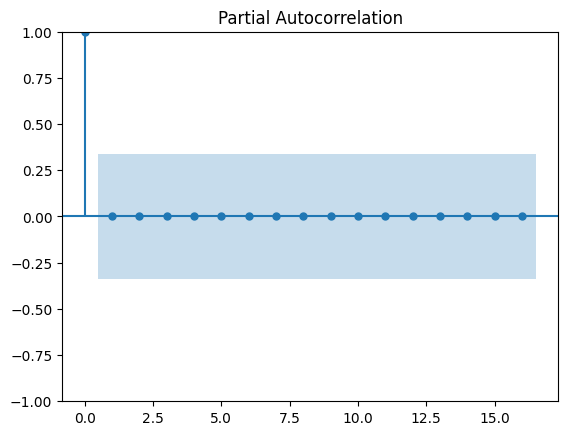

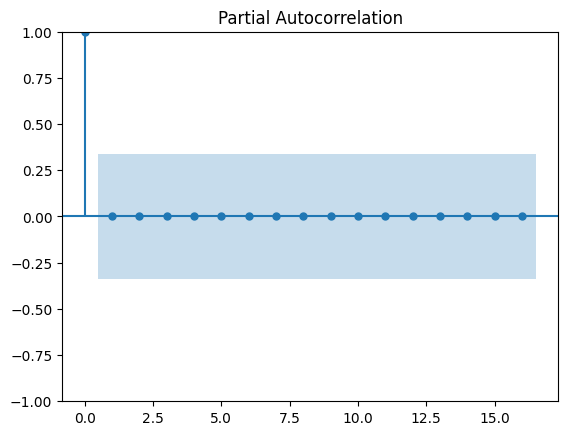

In [ ]:
group = month_data[['date_block_num', 'item_id', 'shop_id', 'item_revenue']].astype(np.float32).groupby(['item_id', 'shop_id', 'date_block_num'])
for item_id, shop_id in zip(np.linspace(0, 200, num=4, dtype=int), np.linspace(0, 55, num=4, dtype=int)):
  plot_pacf(group.mean('item_revenue').xs((item_id, shop_id)))

In [ ]:
create_lags(month_data, groupby=['item_id', 'shop_id', 'date_block_num'], column='item_revenue', lags=[1, 2])

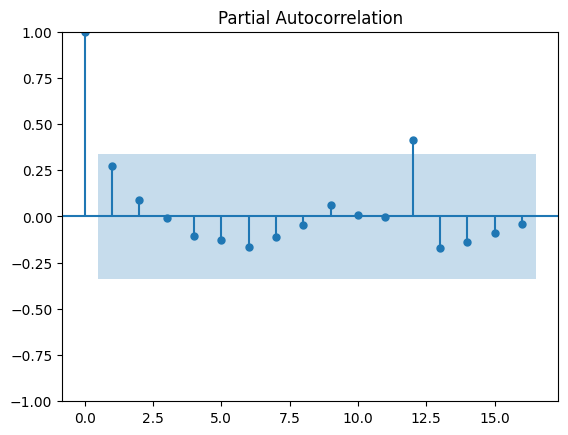

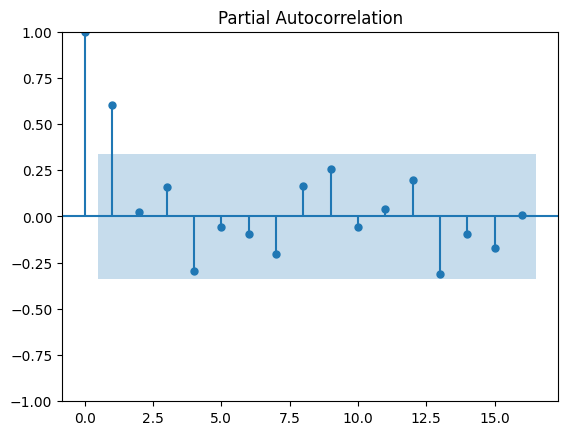

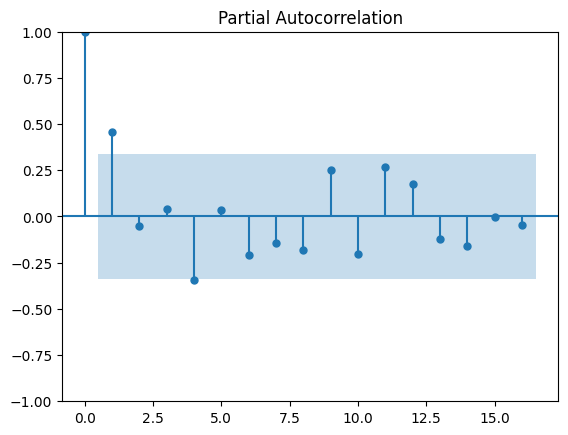

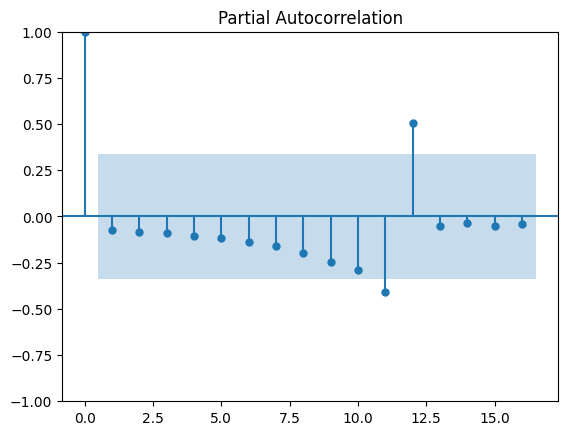

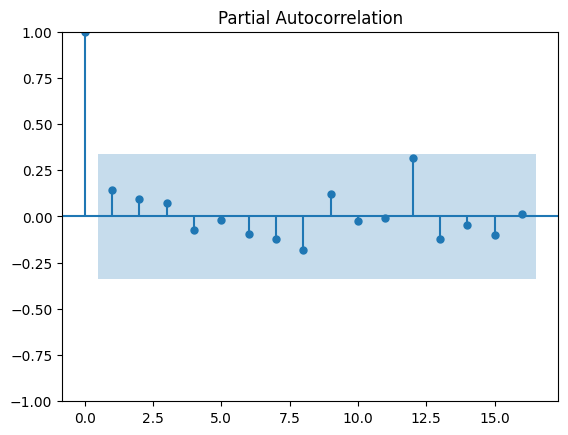

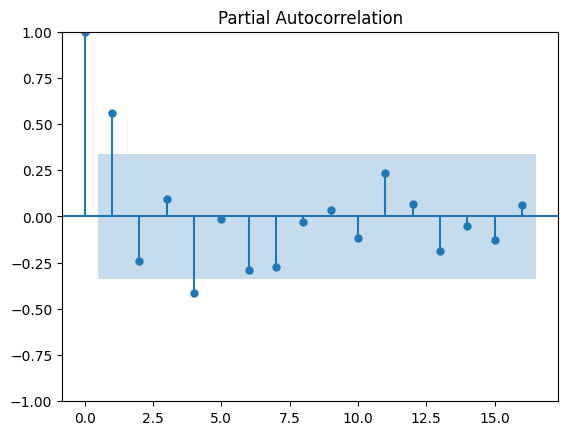

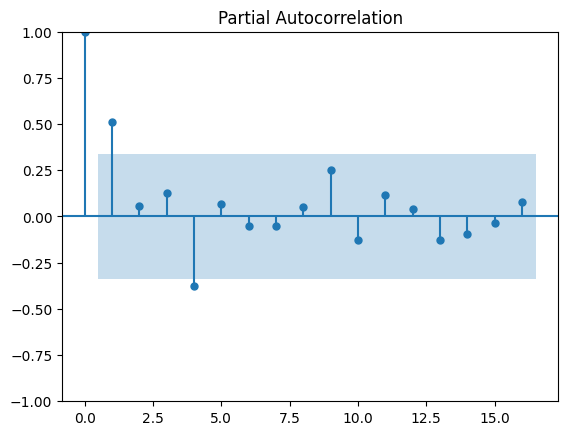

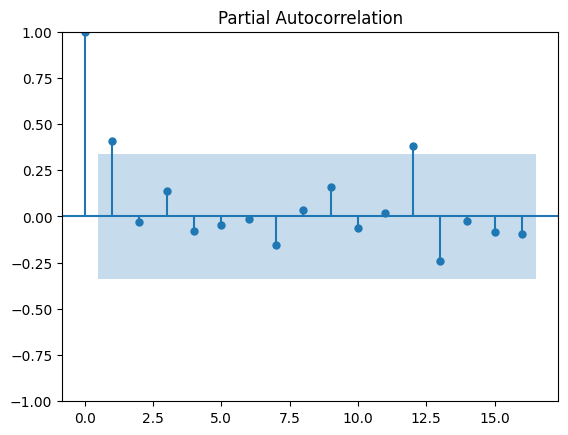

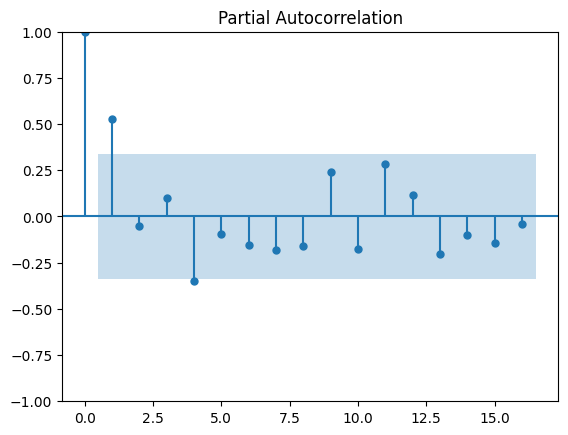

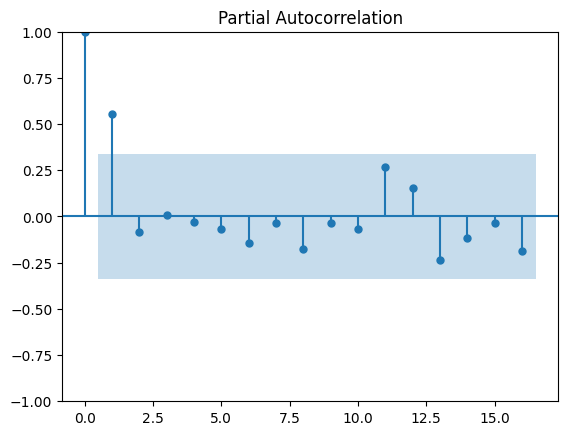

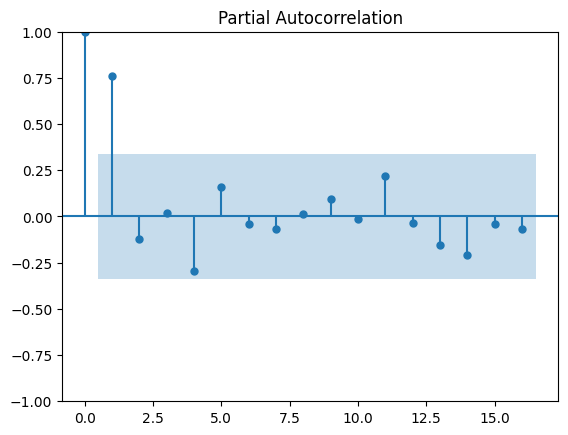

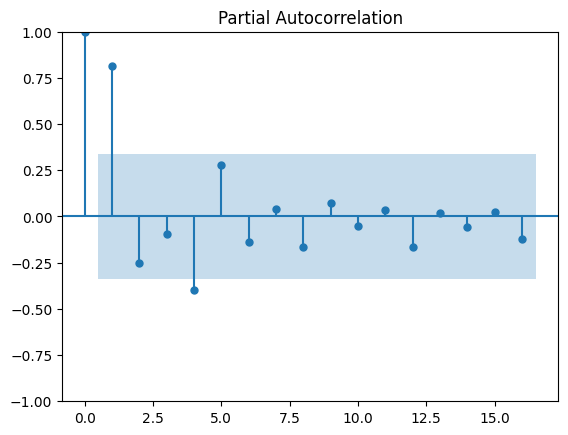

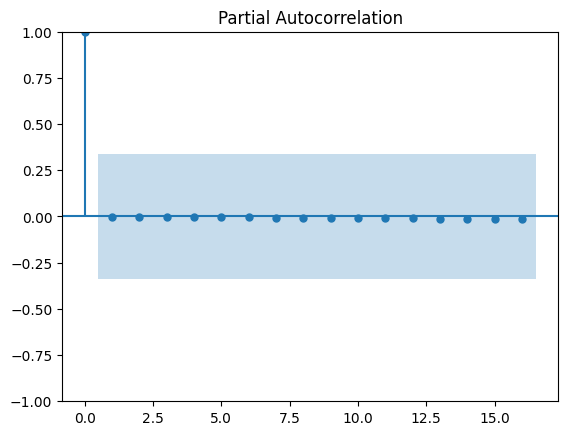

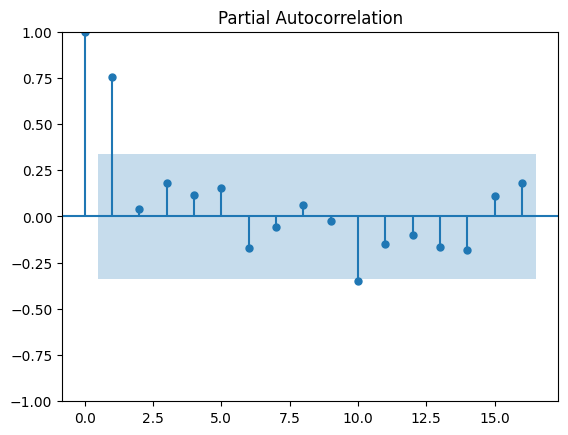

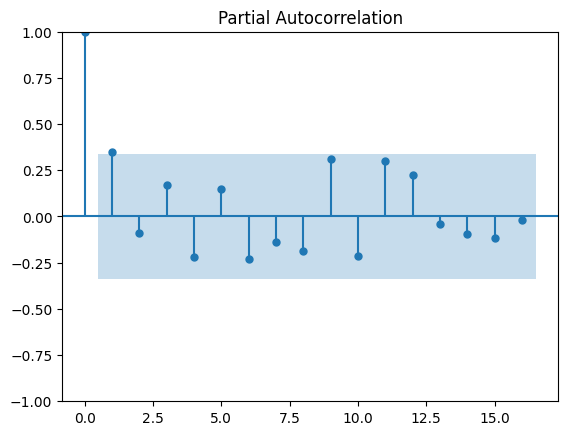

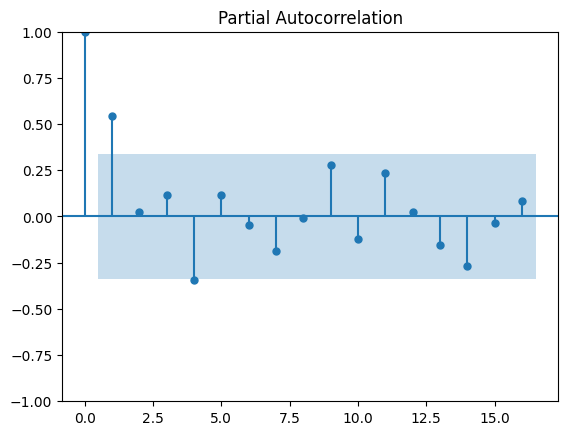

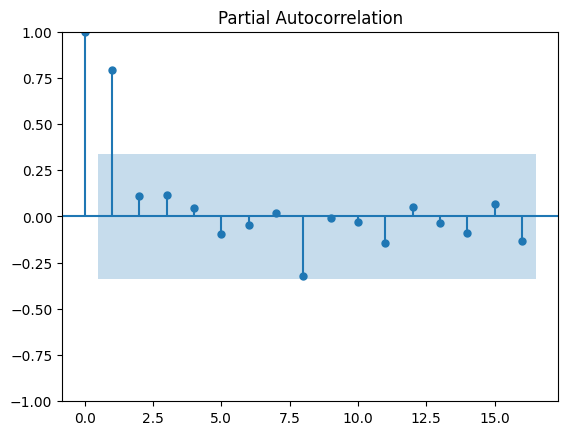

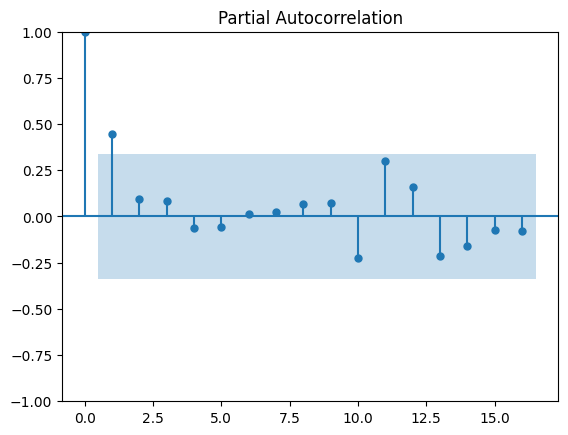

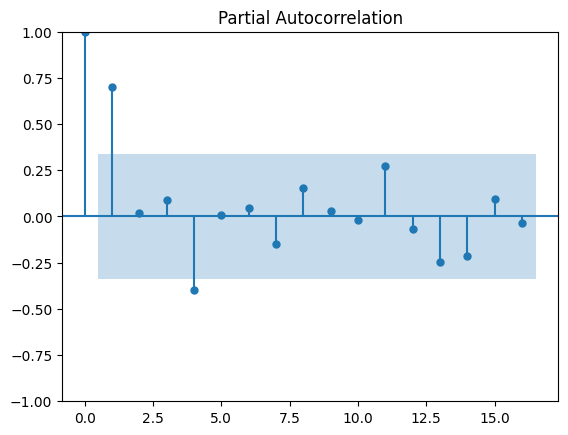

In [ ]:
group = month_data[['date_block_num', 'shop_id', 'relative_shop_delta_revenue']].astype(np.float32).groupby(['shop_id', 'date_block_num'])
for id in range(0, 55, 3):
  plot_pacf(group.mean('relative_shop_delta_revenue').xs(id))

In [ ]:
create_lags(month_data, groupby=['shop_id', 'date_block_num'], column='relative_shop_delta_revenue', lags=[1, 4, 12])

In [ ]:
month_data

date_block_num  shop_id  item_id  avg_price  item_cnt_month  \
0                    0.0        0       32      221.0             6.0   
1                    0.0        0       33      347.0             3.0   
2                    0.0        0       35      247.0             1.0   
3                    0.0        0       43      221.0             1.0   
4                    0.0        0       51      128.5             2.0   
...                  ...      ...      ...        ...             ...   
42965455            33.0       59    22165        0.0             0.0   
42965456            33.0       59    22166        0.0             0.0   
42965457            33.0       59    22167        0.0             0.0   
42965458            33.0       59    22168        0.0             0.0   
42965459            33.0       59    22169        0.0             0.0   

          item_revenue  shop_month_revenue  relative_delta_revenue  \
0               1326.0         2966101.000                0.976562   
1               1041.0         2966101.000                2.667969   
2                247.0         2966101.000                0.584473   
3                221.0         2966101.000               12.250000   
4                257.0         2966101.000                0.310547   
...                ...                 ...                     ...   
42965455           0.0          972724.625                0.000000   
42965456           0.0          972724.625                0.000000   
42965457           0.0          972724.625               -1.000000   
42965458           0.0          972724.625                0.000000   
42965459           0.0          972724.625                0.000000   

          relative_shop_delta_revenue  shop_month_revenue_lag_1  \
0                           -0.157959                       NaN   
1                           -0.157959                       NaN   
2                           -0.157959                       NaN   
3                           -0.157959                       NaN   
4                           -0.157959                       NaN   
...                               ...                       ...   
42965455                    -0.270752                       0.0   
42965456                    -0.270752                       0.0   
42965457                    -0.270752                       0.0   
42965458                    -0.270752                       0.0   
42965459                    -0.270752                       0.0   

          shop_month_revenue_lag_4  shop_month_revenue_lag_12  \
0                              NaN                        NaN   
1                              NaN                        NaN   
2                              NaN                        NaN   
3                              NaN                        NaN   
4                              NaN                        NaN   
...                            ...                        ...   
42965455                       0.0                  4502273.0   
42965456                       0.0                  4502273.0   
42965457                       0.0                  4502273.0   
42965458                       0.0                  4502273.0   
42965459                       0.0                  4502273.0   

          relative_shop_delta_revenue_lag_1  \
0                                       NaN   
1                                       NaN   
2                                       NaN   
3                                       NaN   
4                                       NaN   
...                                     ...   
42965455                               -1.0   
42965456                               -1.0   
42965457                               -1.0   
42965458                               -1.0   
42965459                               -1.0   

          relative_shop_delta_revenue_lag_4  \
0                                       NaN   
1                                       NaN   


In [ ]:
group = month_data[['date_block_num', 'shop_id', 'relative_shop_delta_revenue']].astype(np.float32).groupby(['item_id', 'shop_id', 'date_block_num'])
for id in range(0, 55, 3):
  plot_pacf(group.mean('relative_delta_revenue').xs(id))

In [ ]:
month_data

date_block_num  shop_id  item_id  avg_price  item_cnt_month  \
0                    0.0        0       32      221.0             6.0   
1                    0.0        0       33      347.0             3.0   
2                    0.0        0       35      247.0             1.0   
3                    0.0        0       43      221.0             1.0   
4                    0.0        0       51      128.5             2.0   
...                  ...      ...      ...        ...             ...   
42965455            33.0       59    22165        0.0             0.0   
42965456            33.0       59    22166        0.0             0.0   
42965457            33.0       59    22167        0.0             0.0   
42965458            33.0       59    22168        0.0             0.0   
42965459            33.0       59    22169        0.0             0.0   

          item_revenue  shop_month_revenue  relative_delta_revenue  \
0               1326.0         2966101.000                0.976562   
1               1041.0         2966101.000                2.667969   
2                247.0         2966101.000                0.584473   
3                221.0         2966101.000               12.250000   
4                257.0         2966101.000                0.310547   
...                ...                 ...                     ...   
42965455           0.0          972724.625                0.000000   
42965456           0.0          972724.625                0.000000   
42965457           0.0          972724.625               -1.000000   
42965458           0.0          972724.625                0.000000   
42965459           0.0          972724.625                0.000000   

          relative_shop_delta_revenue  shop_month_revenue_lag_1  \
0                           -0.157959                       NaN   
1                           -0.157959                       NaN   
2                           -0.157959                       NaN   
3                           -0.157959                       NaN   
4                           -0.157959                       NaN   
...                               ...                       ...   
42965455                    -0.270752                       0.0   
42965456                    -0.270752                       0.0   
42965457                    -0.270752                       0.0   
42965458                    -0.270752                       0.0   
42965459                    -0.270752                       0.0   

          shop_month_revenue_lag_4  shop_month_revenue_lag_12  \
0                              NaN                        NaN   
1                              NaN                        NaN   
2                              NaN                        NaN   
3                              NaN                        NaN   
4                              NaN                        NaN   
...                            ...                        ...   
42965455                       0.0                  4502273.0   
42965456                       0.0                  4502273.0   
42965457                       0.0                  4502273.0   
42965458                       0.0                  4502273.0   
42965459                       0.0                  4502273.0   

          item_revenue_lag_1  item_revenue_lag_2  \
0                        NaN                 NaN   
1                        NaN                 NaN   
2                        NaN                 NaN   
3                        NaN                 NaN   
4                        NaN                 NaN   
...                      ...                 ...   
42965455                 0.0                 0.0   
42965456                 0.0                 0.0   
42965457                 0.0                 0.0   
42965458                 0.0                 0.0   
42965459                 0.0                 0.0   

          relative_shop_delta_revenue_lag_1  \
0                                 

In [ ]:
month_data.dtypes

date_block_num                        float16
shop_id                                  int8
item_id                                 int16
avg_price                             float16
item_cnt_month                        float16
item_revenue                          float32
shop_month_revenue                    float32
relative_delta_revenue                float16
relative_shop_delta_revenue           float16
shop_month_revenue_lag_1              float32
shop_month_revenue_lag_4              float32
shop_month_revenue_lag_12             float32
item_revenue_lag_1                    float32
item_revenue_lag_2                    float32
relative_shop_delta_revenue_lag_1     float32
relative_shop_delta_revenue_lag_4     float32
relative_shop_delta_revenue_lag_12    float32
dtype: object

In [ ]:
month_data['relative_shop_delta_revenue_lag_1'] = month_data['relative_shop_delta_revenue_lag_1'].astype(np.float16)
month_data['relative_shop_delta_revenue_lag_4'] = month_data['relative_shop_delta_revenue_lag_4'].astype(np.float16)
month_data['relative_shop_delta_revenue_lag_12'] = month_data['relative_shop_delta_revenue_lag_12'].astype(np.float16)

### Date features

In [ ]:
month_data['month'] = month_data['date_block_num'] % 12
month_data['year'] = month_data['date_block_num'] // 12

In [ ]:
month_data

date_block_num  shop_id  item_id  avg_price  item_cnt_month  \
0                    0.0        0       32      221.0             6.0   
1                    0.0        0       33      347.0             3.0   
2                    0.0        0       35      247.0             1.0   
3                    0.0        0       43      221.0             1.0   
4                    0.0        0       51      128.5             2.0   
...                  ...      ...      ...        ...             ...   
42965455            33.0       59    22165        0.0             0.0   
42965456            33.0       59    22166        0.0             0.0   
42965457            33.0       59    22167        0.0             0.0   
42965458            33.0       59    22168        0.0             0.0   
42965459            33.0       59    22169        0.0             0.0   

          item_revenue  shop_month_revenue  relative_delta_revenue  \
0               1326.0         2966101.000                0.976562   
1               1041.0         2966101.000                2.667969   
2                247.0         2966101.000                0.584473   
3                221.0         2966101.000               12.250000   
4                257.0         2966101.000                0.310547   
...                ...                 ...                     ...   
42965455           0.0          972724.625                0.000000   
42965456           0.0          972724.625                0.000000   
42965457           0.0          972724.625               -1.000000   
42965458           0.0          972724.625                0.000000   
42965459           0.0          972724.625                0.000000   

          relative_shop_delta_revenue  shop_month_revenue_lag_1  \
0                           -0.157959                       NaN   
1                           -0.157959                       NaN   
2                           -0.157959                       NaN   
3                           -0.157959                       NaN   
4                           -0.157959                       NaN   
...                               ...                       ...   
42965455                    -0.270752                       0.0   
42965456                    -0.270752                       0.0   
42965457                    -0.270752                       0.0   
42965458                    -0.270752                       0.0   
42965459                    -0.270752                       0.0   

          shop_month_revenue_lag_4  shop_month_revenue_lag_12  \
0                              NaN                        NaN   
1                              NaN                        NaN   
2                              NaN                        NaN   
3                              NaN                        NaN   
4                              NaN                        NaN   
...                            ...                        ...   
42965455                       0.0                  4502273.0   
42965456                       0.0                  4502273.0   
42965457                       0.0                  4502273.0   
42965458                       0.0                  4502273.0   
42965459                       0.0                  4502273.0   

          relative_shop_delta_revenue_lag_1  \
0                                       NaN   
1                                       NaN   
2                                       NaN   
3                                       NaN   
4                                       NaN   
...                                     ...   
42965455                               -1.0   
42965456                               -1.0   
42965457                               -1.0   
42965458                               -1.0   
42965459                               -1.0   

          relative_shop_delta_revenue_lag_4  \
0                                       NaN   
1                                       NaN   


In [ ]:
gc.collect()

16

In [ ]:
month_data.dtypes

date_block_num                        float16
shop_id                                  int8
item_id                                 int16
avg_price                             float16
item_cnt_month                        float16
item_revenue                          float32
shop_month_revenue                    float32
relative_delta_revenue                float16
relative_shop_delta_revenue           float16
shop_month_revenue_lag_1              float32
shop_month_revenue_lag_4              float32
shop_month_revenue_lag_12             float32
item_revenue_lag_1                    float32
item_revenue_lag_2                    float32
relative_shop_delta_revenue_lag_1     float16
relative_shop_delta_revenue_lag_4     float16
relative_shop_delta_revenue_lag_12    float16
month                                 float16
year                                  float16
dtype: object

In [ ]:
month_data['month'] = month_data['month'].astype(np.int8)
month_data['year'] = month_data['year'].astype(np.int8)

In [ ]:
month_data.to_csv('/mydrive/DSPractice/data/eda/numeric_features.csv', index=False)

In [ ]:
month_data = dd.read_csv('/mydrive/DSPractice/data/eda/numeric_features.csv')

In [ ]:
month_data = month_data.merge(address, left_on='shop_id', right_index=True)

In [ ]:
items

item_id  item_category_id                name2  \
0            0                40                    0   
1            1                76  pc, цифровая версия   
2            2                40                    0   
3            3                40                    0   
4            4                40                    0   
...        ...               ...                  ...   
22165    22165                31  pc, цифровая версия   
22166    22166                54      цифровая версия   
22167    22167                49                    0   
22168    22168                62                    0   
22169    22169                69                    0   

                                 name3  
0                    пласт.)         d  
1                                    0  
2            unv)                    d  
3         univ)                      d  
4      стекло)                       d  
...                                ...  
22165                                0  
22166                                0  
22167            +cd). хрусталева е.ю.  
22168                                0  
22169                  игра престолов)  

[22170 rows x 4 columns]

In [ ]:
month_data = month_data.merge(items, on='item_id')

In [ ]:
item_categories.drop(columns=['split', 'item_category_name'], inplace=True)

In [ ]:
month_data = month_data.merge(item_categories, on='item_category_id')

In [ ]:
month_data.to_csv('/mydrive/DSPractice/data/eda/features.csv', index=False)

['/mydrive/DSPractice/data/eda/features.csv/00.part',
 '/mydrive/DSPractice/data/eda/features.csv/01.part',
 '/mydrive/DSPractice/data/eda/features.csv/02.part',
 '/mydrive/DSPractice/data/eda/features.csv/03.part',
 '/mydrive/DSPractice/data/eda/features.csv/04.part',
 '/mydrive/DSPractice/data/eda/features.csv/05.part',
 '/mydrive/DSPractice/data/eda/features.csv/06.part',
 '/mydrive/DSPractice/data/eda/features.csv/07.part',
 '/mydrive/DSPractice/data/eda/features.csv/08.part',
 '/mydrive/DSPractice/data/eda/features.csv/09.part',
 '/mydrive/DSPractice/data/eda/features.csv/10.part',
 '/mydrive/DSPractice/data/eda/features.csv/11.part',
 '/mydrive/DSPractice/data/eda/features.csv/12.part',
 '/mydrive/DSPractice/data/eda/features.csv/13.part',
 '/mydrive/DSPractice/data/eda/features.csv/14.part',
 '/mydrive/DSPractice/data/eda/features.csv/15.part',
 '/mydrive/DSPractice/data/eda/features.csv/16.part',
 '/mydrive/DSPractice/data/eda/features.csv/17.part',
 '/mydrive/DSPractice/data/e

### Explore test data

In [ ]:
data['test'].replace({'shop_id': replace_shops_id}, inplace=True)

In [ ]:
data['test'].sample(10)

ID  shop_id  item_id
103131  103131       42     5025
91075    91075       18     5001
31585    31585       10     6457
24059    24059        2     8418
151384  151384       59     6065
207936  207936       39     9329
76310    76310       21    13133
152615  152615       59     2922
143885  143885        1     8455
206560  206560       39     5659

Let's look if we have the same shops and items and their combinations in train and test data.

In [ ]:
len(set(data['test']['item_id']) - set(items['item_id']))

0

In [ ]:
len(set(data['test']['shop_id']) - set(items['item_id']))

0

We have the same shops and items in test and train data.

In [ ]:
s_train = set([(shop_id, item_id) for (shop_id, item_id) in merged_data[['shop_id', 'item_id']].values])
s_test = set([(shop_id, item_id) for (shop_id, item_id) in data['test'][['shop_id', 'item_id']].values])

In [ ]:
len(s_test), len(s_train)

(214200, 418898)

In [ ]:
len(s_test - s_train)

102735

There are pairs (`shop_id`, `item_id`) that are in test data but are not present in train data.

Maybe, if these items hasn't been sold all these month, they won't be sold next month, so for pairs that aren't present in train data we can just predict 0.